<a href="https://colab.research.google.com/github/Anuj347/Cooling-demand-forecast/blob/main/Exnaton_Coding_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [42]:
df = pd.read_excel('Machine Learning Coding Challenge_dataset.xlsx')

In [44]:
df['Time'] = pd.to_datetime(df['Time'])

In [45]:
print(df.head())

   Electricity.Timestep                Time  Sum [kWh].0  Sum [kWh].1  \
0                     0 2022-01-01 00:00:00     0.041346     0.066354   
1                    15 2022-01-01 00:15:00     0.024794     0.067132   
2                    30 2022-01-01 00:30:00     0.043701     0.066478   
3                    45 2022-01-01 00:45:00     0.043374     0.076322   
4                    60 2022-01-01 01:00:00     0.023892     0.066500   

   Sum [kWh].2  Sum [kWh].3  Sum [kWh].4  Sum [kWh].5  Sum [kWh].6  \
0     0.072797     0.002957     0.040572     0.044009     0.056274   
1     0.091674     0.003018     0.009139     0.046210     0.040607   
2     0.081484     0.002890     0.009055     0.023968     0.040729   
3     0.074713     0.002990     0.009225     0.044659     0.022517   
4     0.074037     0.002914     0.009189     0.026412     0.019049   

   Sum [kWh].7  Sum [kWh].8  Sum [kWh].9  
0     0.003023     0.074690     0.103507  
1     0.003114     0.056418     0.088745  
2     0.002

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87552 entries, 0 to 87551
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Electricity.Timestep  87552 non-null  int64         
 1   Time                  87552 non-null  datetime64[ns]
 2   Sum [kWh].0           87552 non-null  float64       
 3   Sum [kWh].1           87552 non-null  float64       
 4   Sum [kWh].2           87552 non-null  float64       
 5   Sum [kWh].3           87552 non-null  float64       
 6   Sum [kWh].4           87552 non-null  float64       
 7   Sum [kWh].5           87552 non-null  float64       
 8   Sum [kWh].6           87552 non-null  float64       
 9   Sum [kWh].7           87552 non-null  float64       
 10  Sum [kWh].8           87552 non-null  float64       
 11  Sum [kWh].9           87552 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 8.0 MB


In [47]:
df.describe()

Electricity.Timestep                           Time   Sum [kWh].0  \
count          8.755200e+04                          87552  87552.000000   
mean           6.566325e+05  2023-04-01 23:52:30.000000256      0.084364   
min            0.000000e+00            2022-01-01 00:00:00      0.022584   
25%            3.283162e+05            2022-08-16 23:56:15      0.032920   
50%            6.566325e+05            2023-04-01 23:52:30      0.044670   
75%            9.849488e+05            2023-11-15 23:48:45      0.067181   
max            1.313265e+06            2024-06-30 23:45:00      1.525849   
std            3.791134e+05                            NaN      0.121501   

        Sum [kWh].1   Sum [kWh].2   Sum [kWh].3   Sum [kWh].4   Sum [kWh].5  \
count  87552.000000  87552.000000  87552.000000  87552.000000  87552.000000   
mean       0.065745      0.057693      0.006136      0.031258      0.070827   
min        0.010881      0.008427      0.000000      0.008301      0.017967   
25%        0.012785      0.008860      0.002915      0.009128      0.030309   
50%        0.012998      0.021488      0.002993      0.009205      0.042595   
75%        0.022171      0.069467      0.003061      0.012588      0.063264   
max        1.556929      1.436898      0.053291      1.178009      1.545542   
std        0.147384      0.113140      0.012445      0.076209      0.114945   

        Sum [kWh].6   Sum [kWh].7   Sum [kWh].8   Sum [kWh].9  
count  87552.000000  87552.000000  87552.000000  87552.000000  
mean       0.062657      0.003470      0.064359      0.090391  
min        0.012244      0.000000      0.019283      0.016848  
25%        0.015144      0.002921      0.019836      0.022033  
50%        0.023412      0.002994      0.038785      0.040322  
75%        0.037568      0.003060      0.051429      0.049024  
max        1.568173      0.180356      1.167330      1.227204  
std        0.133926      0.008049      0.094981      0.153792

In [48]:
df.isnull().sum()

Electricity.Timestep    0
Time                    0
Sum [kWh].0             0
Sum [kWh].1             0
Sum [kWh].2             0
Sum [kWh].3             0
Sum [kWh].4             0
Sum [kWh].5             0
Sum [kWh].6             0
Sum [kWh].7             0
Sum [kWh].8             0
Sum [kWh].9             0
dtype: int64

## **Data Understanding, Exploration, and Preprocessing**

In [49]:
df['hour'] = df['Time'].dt.hour
df['day_of_week'] = df['Time'].dt.dayofweek
df['month'] = df['Time'].dt.month
df['Day'] = df['Time'].dt.day

In [50]:
household_columns = [col for col in df.columns if 'Sum [kWh]' in col]

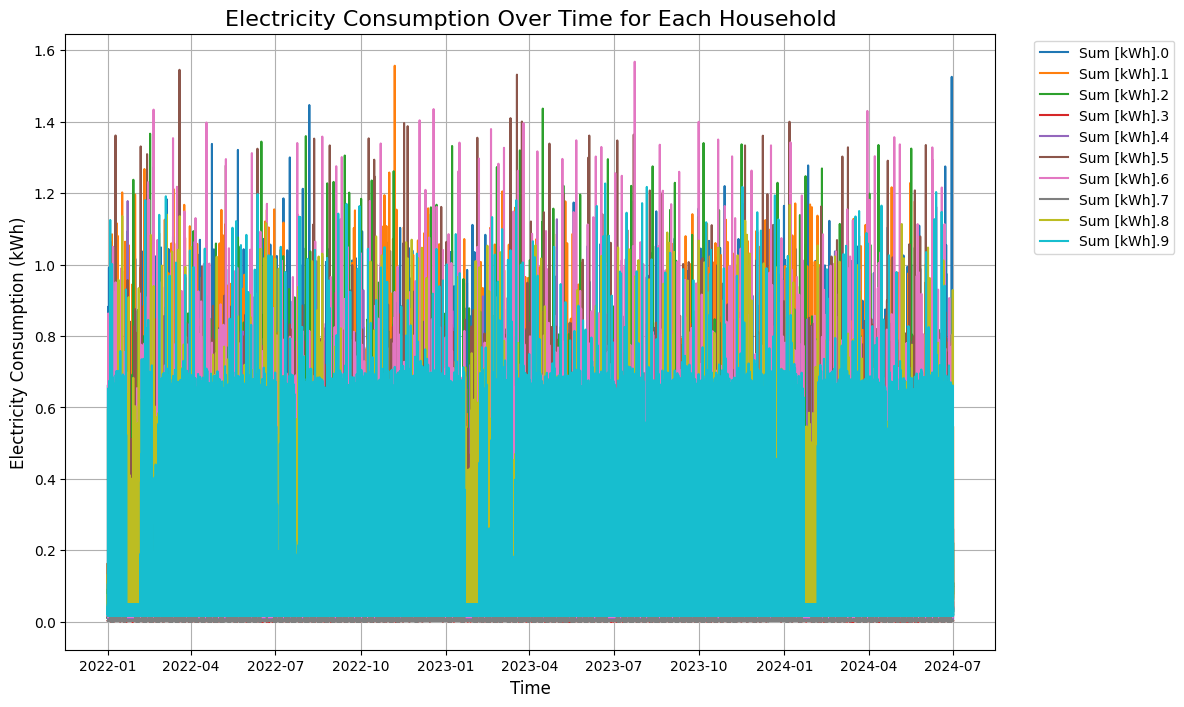

In [51]:
plt.figure(figsize=(12,8))
for col in household_columns:
    plt.plot(df['Time'], df[col], label=col)
plt.title('Electricity Consumption Over Time for Each Household', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Electricity Consumption (kWh)', fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()

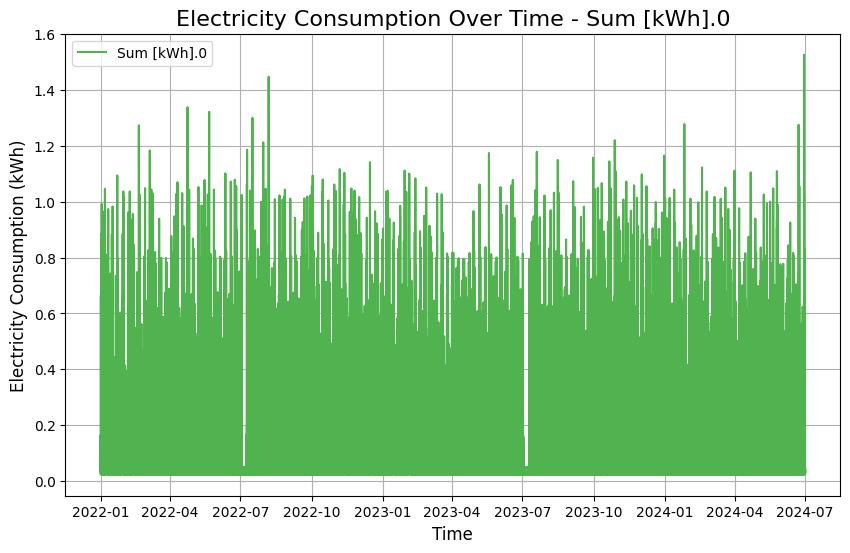

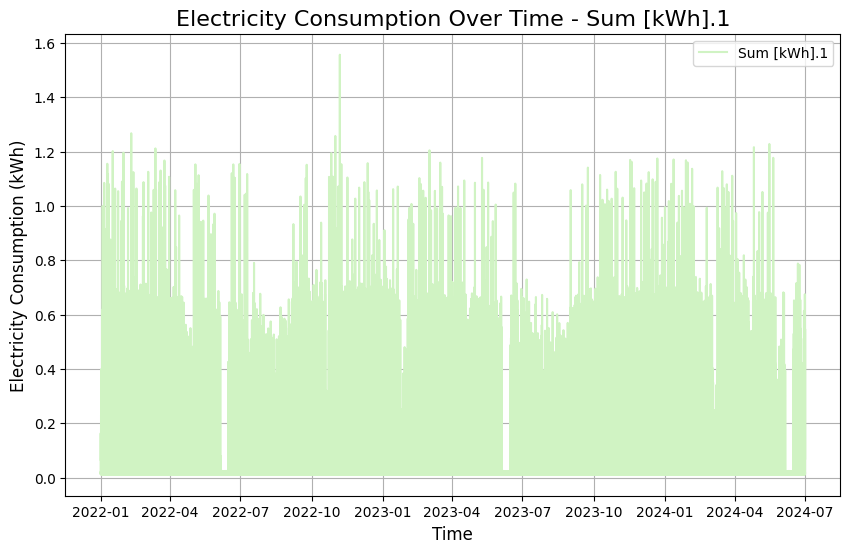

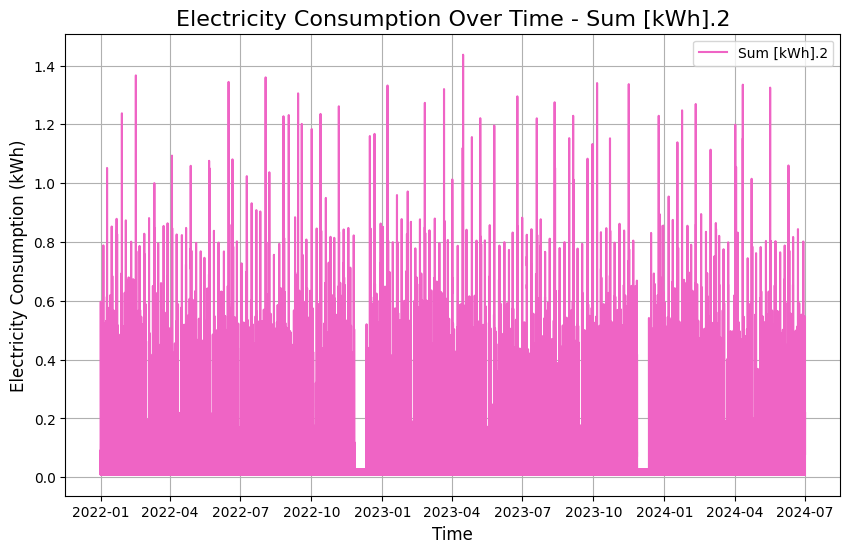

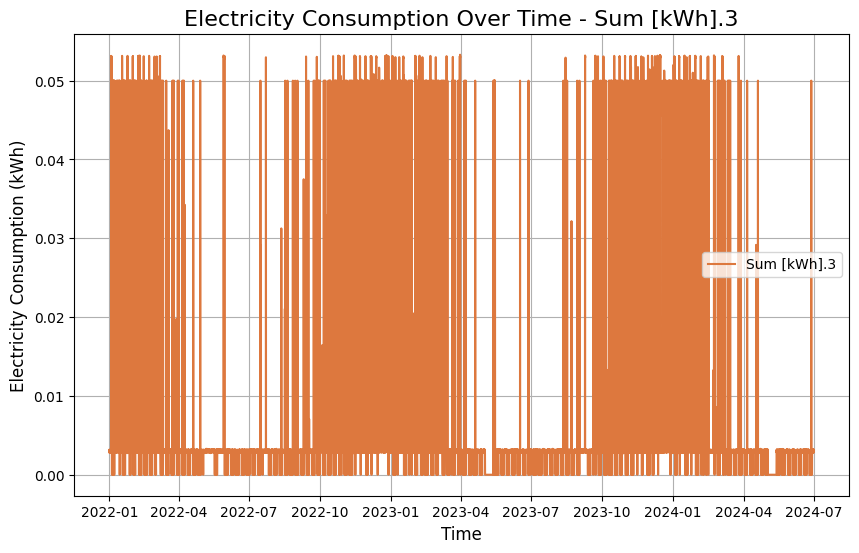

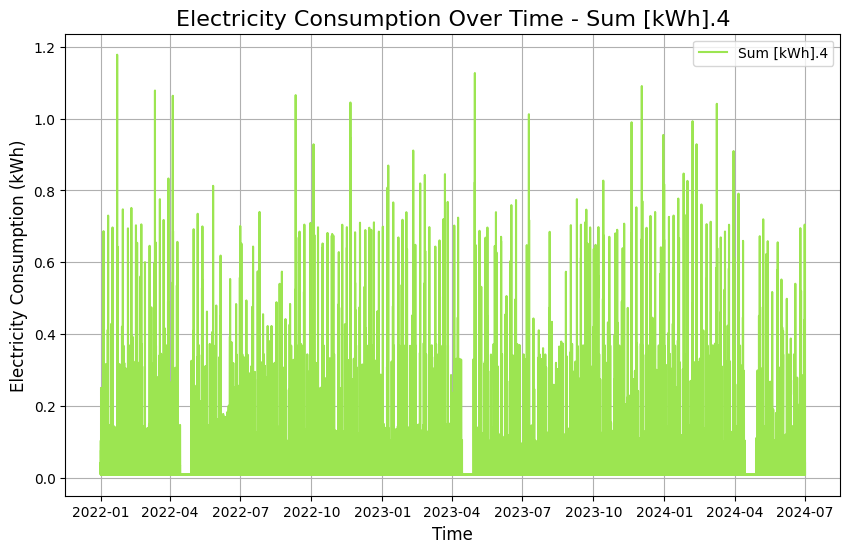

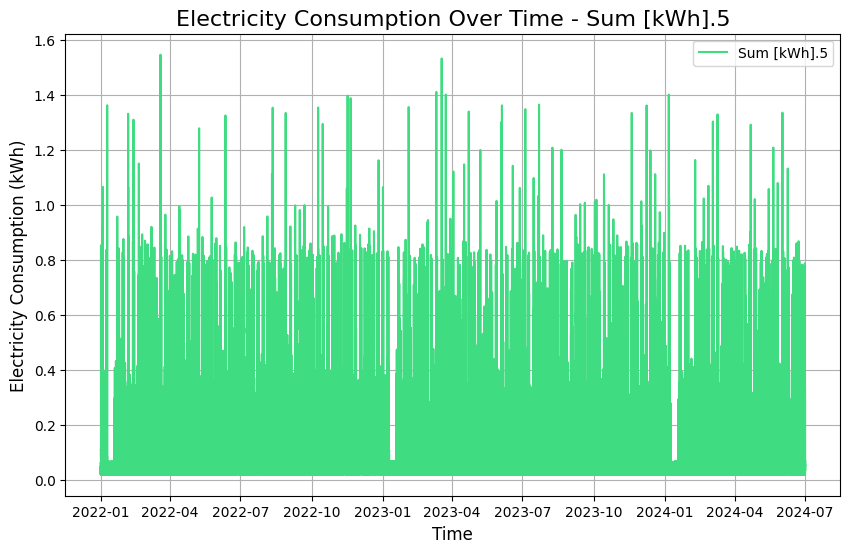

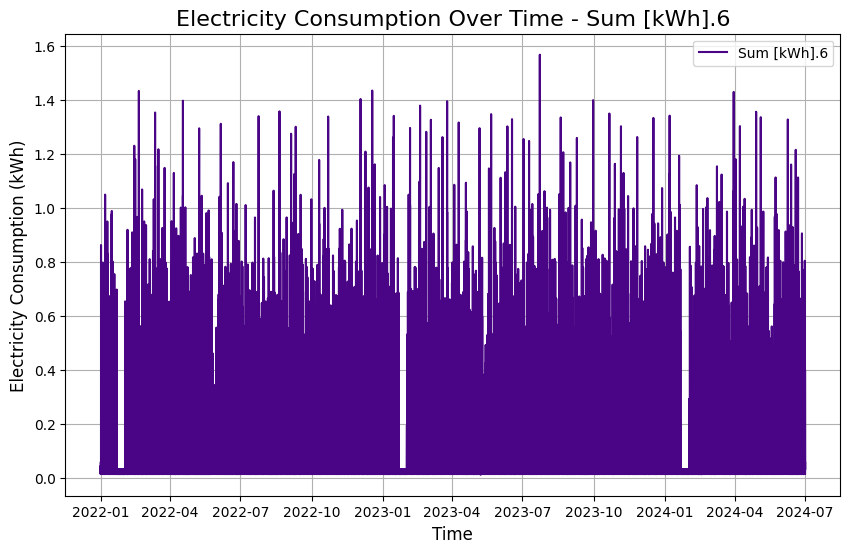

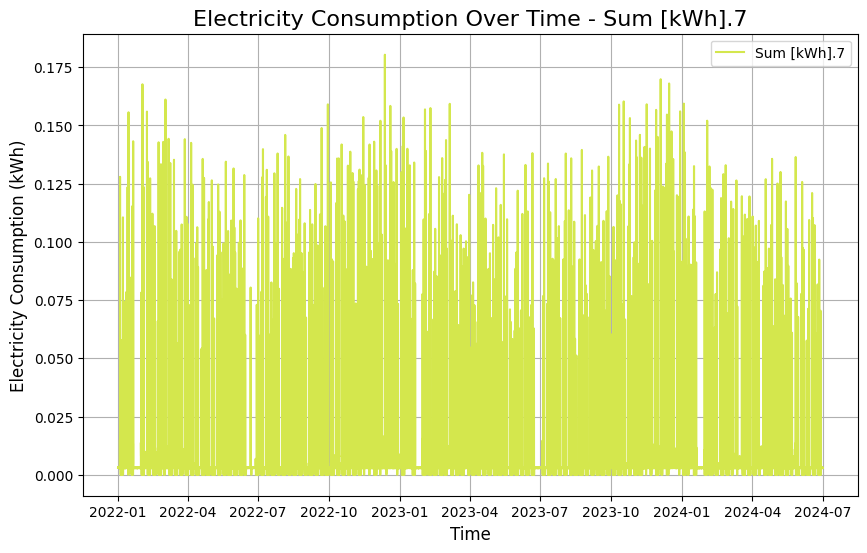

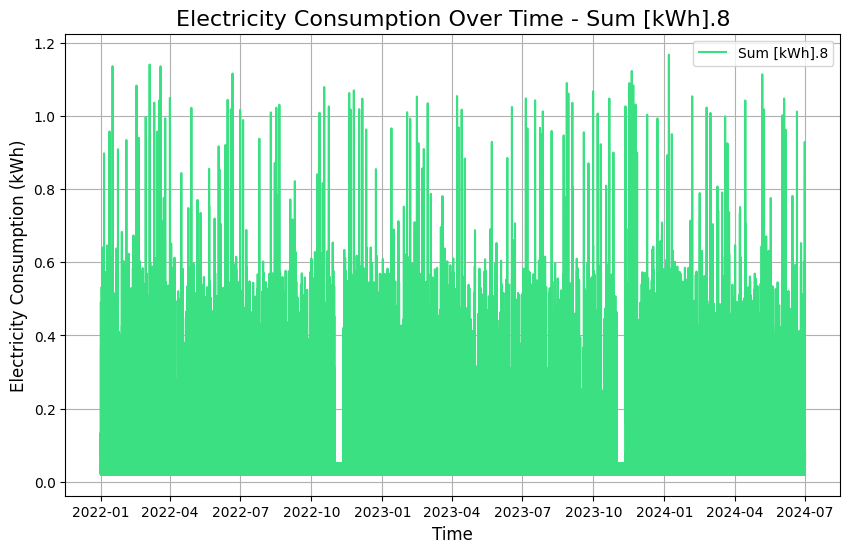

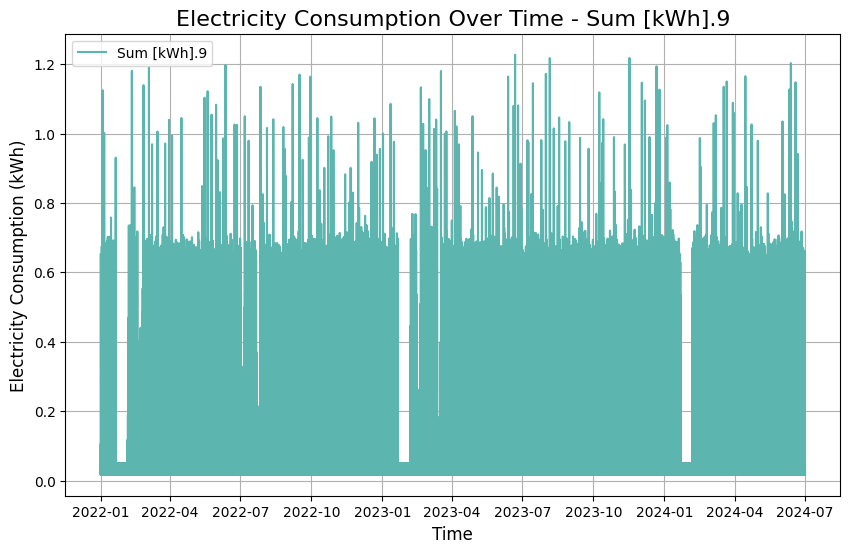

In [52]:
for col in household_columns:
    plt.figure(figsize=(10,6))
    plt.plot(df['Time'], df[col], color=np.random.rand(3,), label=col)
    plt.title(f'Electricity Consumption Over Time - {col}', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Electricity Consumption (kWh)', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

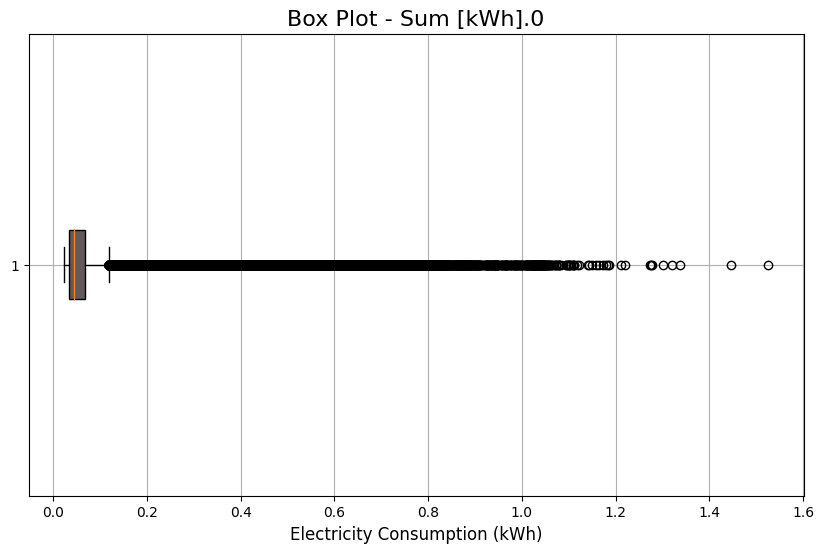

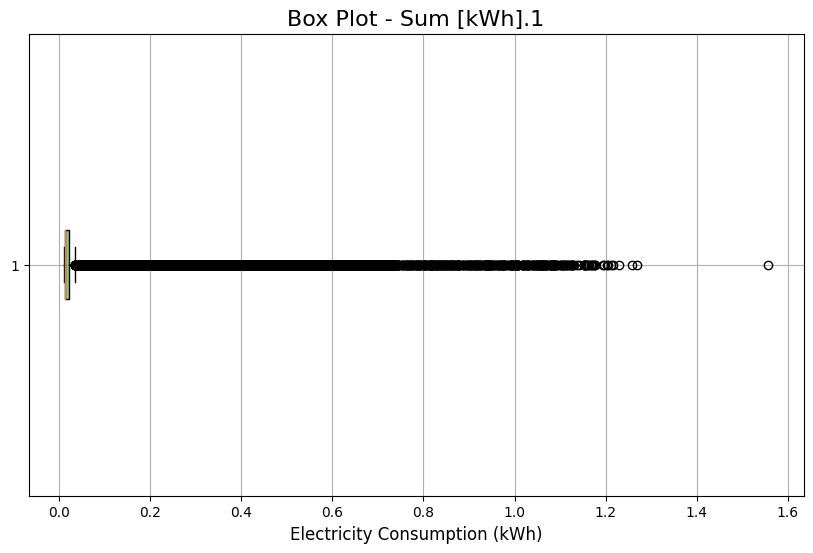

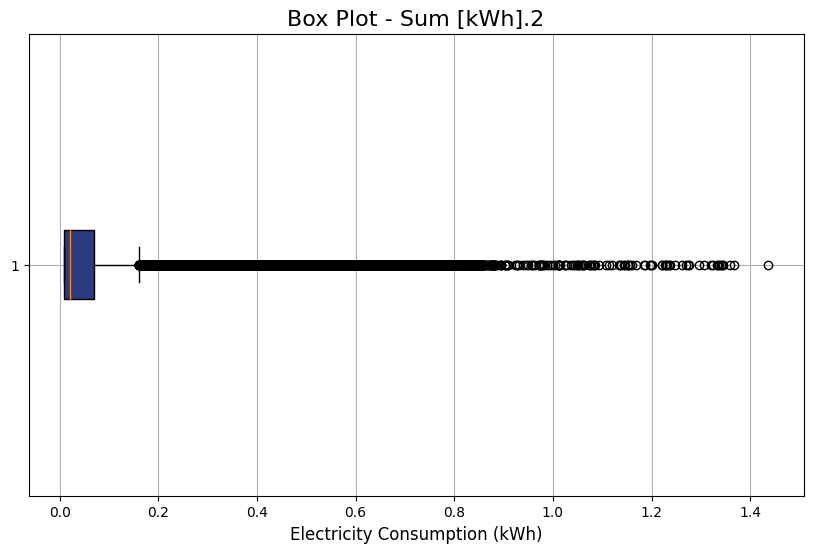

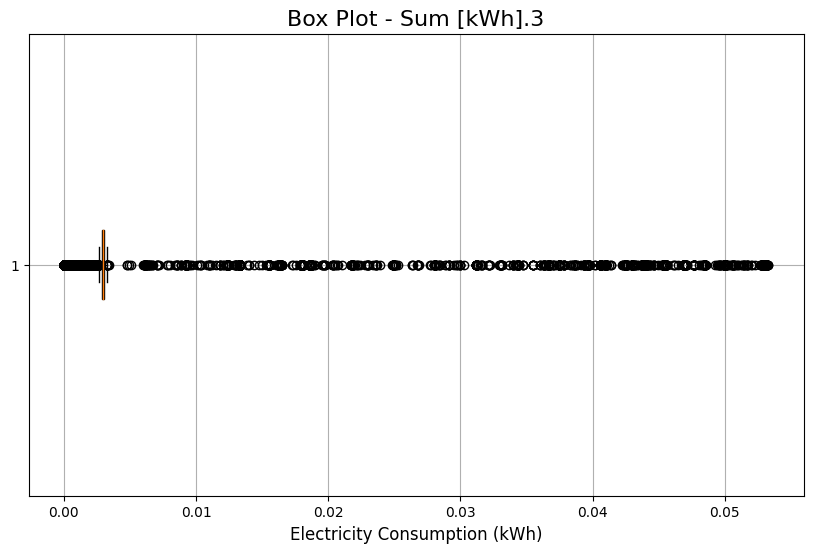

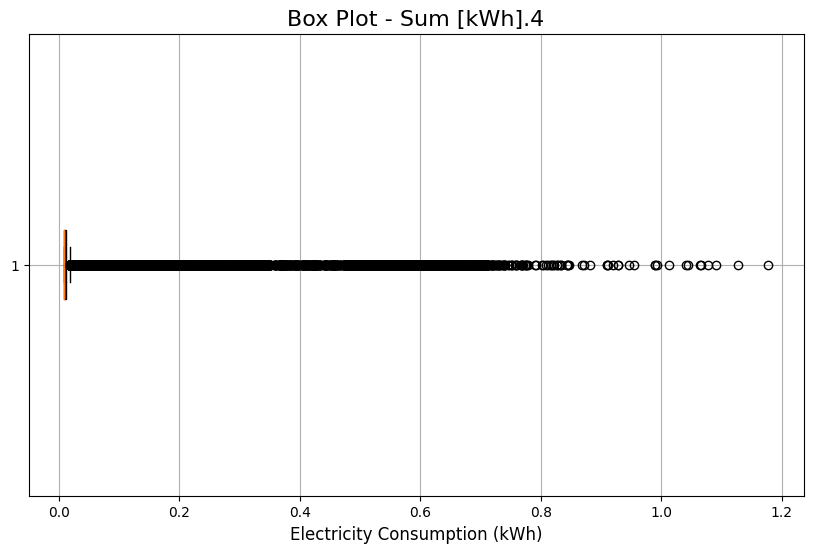

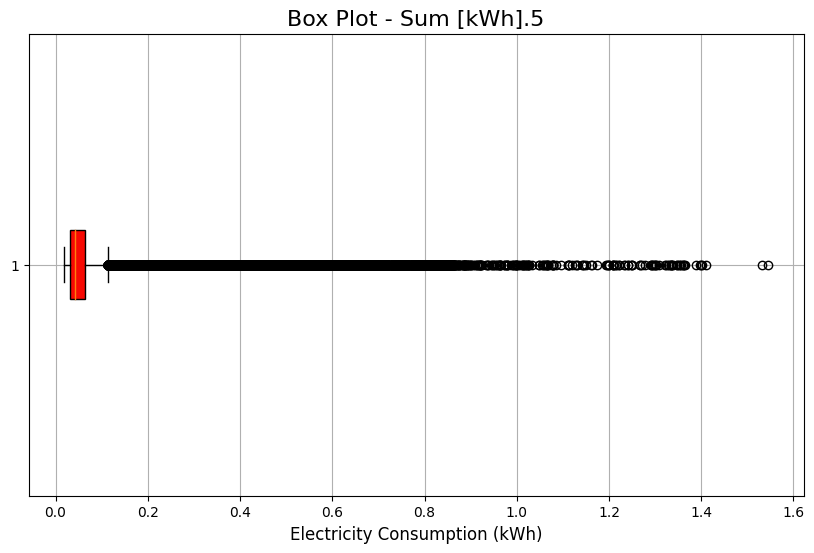

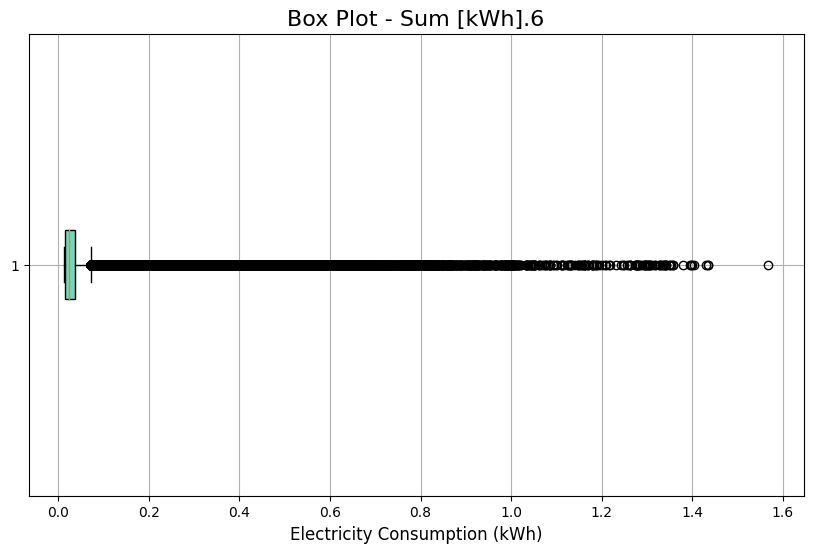

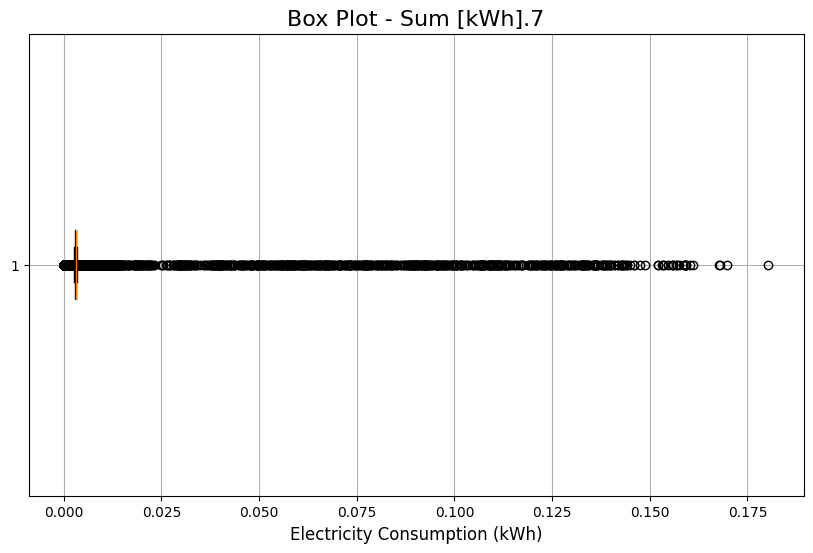

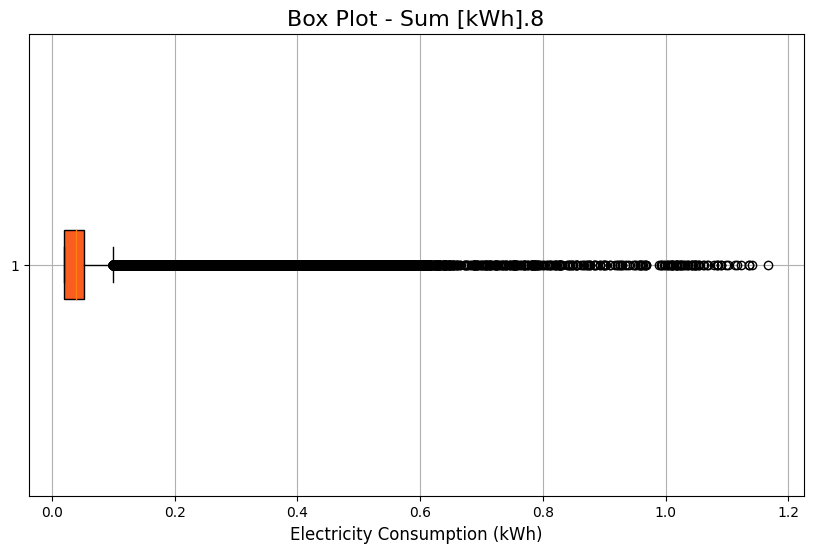

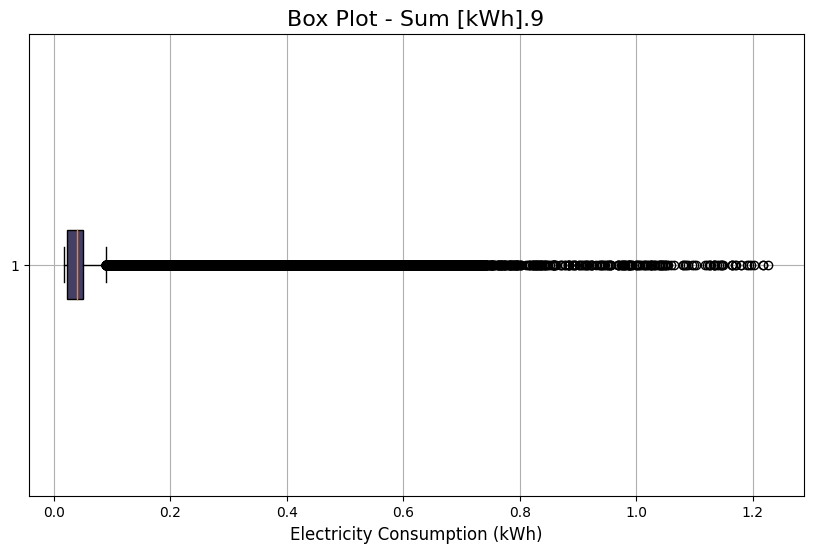

In [53]:
for col in household_columns:
    plt.figure(figsize=(10,6))
    plt.boxplot(df[col], patch_artist=True, boxprops=dict(facecolor=np.random.rand(3,)), vert=False)
    plt.title(f'Box Plot - {col}', fontsize=16)
    plt.xlabel('Electricity Consumption (kWh)', fontsize=12)
    plt.grid(True)
    plt.show()


## Other potential inputs could improve the forecast. (Needs to be improved)



*   Weather: Temperature, humidity, wind speed, etc.

*   Time Features: Hour, day of the week, month, holiday effects.

*   Demographics: Household size, income, building type, ownership of appliances.

*   Electricity Prices: Pricing schemes, tariffs, peak/off-peak pricing.

*   Occupancy Data: Smart home devices, occupancy status.


*   Event Data: Major local or global events.


*   Energy Programs: Efficiency programs, demand response participation.


*   Renewable Energy: Solar PV generation, energy storage.


Incorporating these inputs into your forecasting model can provide a more accurate and comprehensive prediction of household electricity consumption, accounting for both predictable patterns and external influences.


# **Baseline Model**

In [54]:
baseline_results = {}

In [55]:
last_24_hours = 96

Processing Sum [kWh].0...


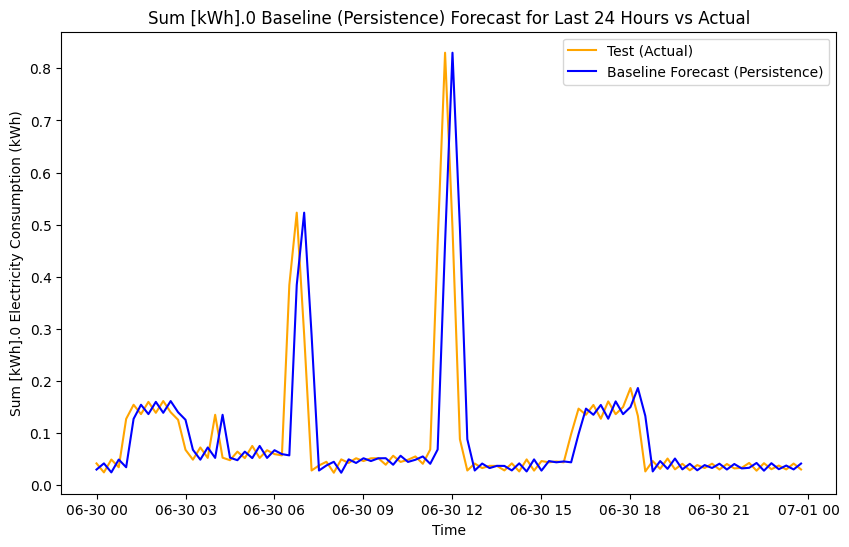

Processing Sum [kWh].1...


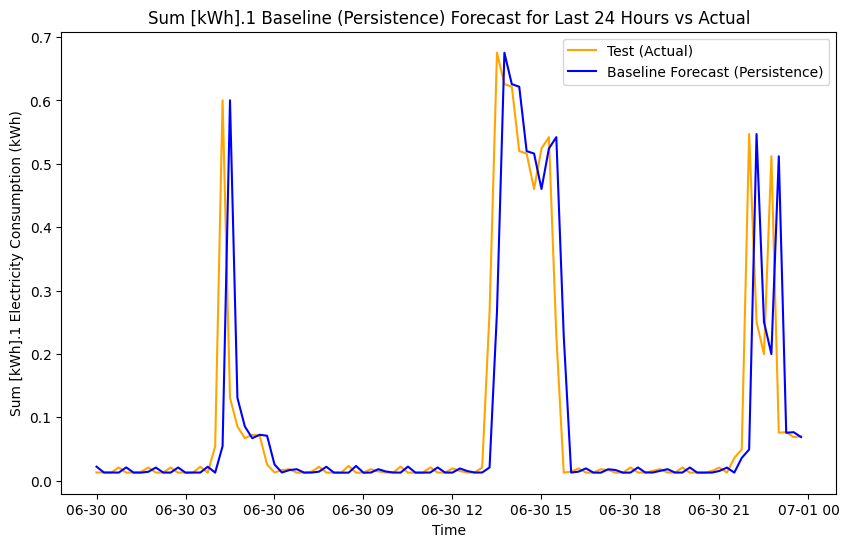

Processing Sum [kWh].2...


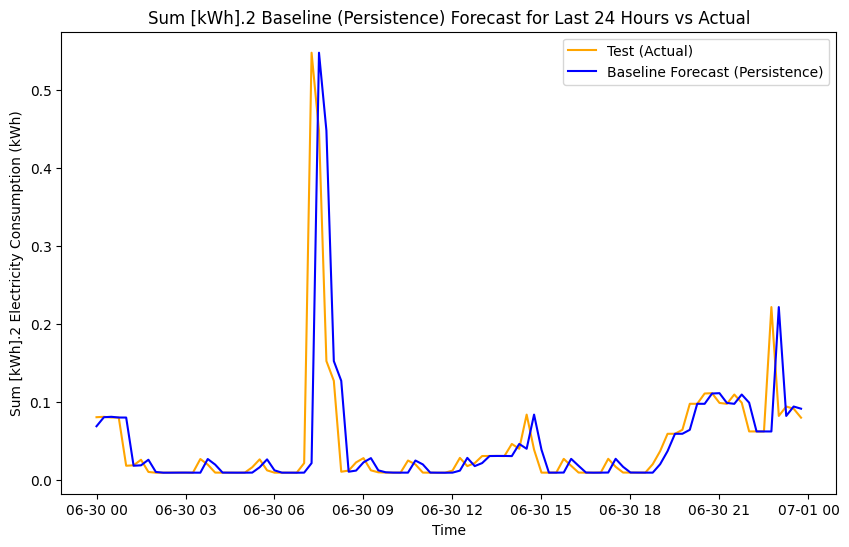

Processing Sum [kWh].3...


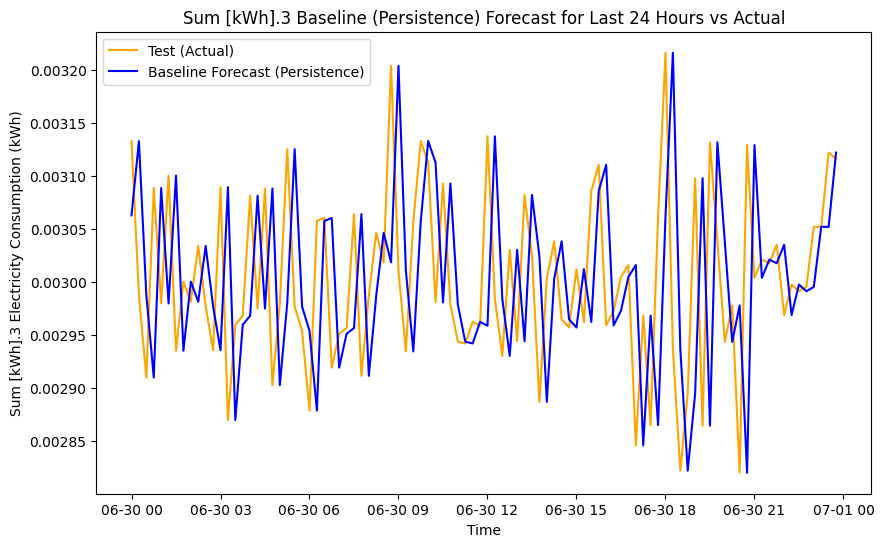

Processing Sum [kWh].4...


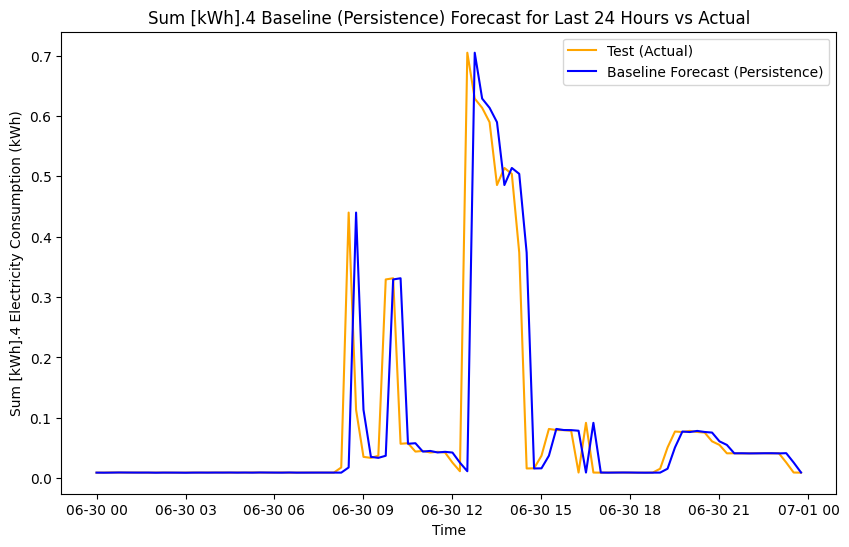

Processing Sum [kWh].5...


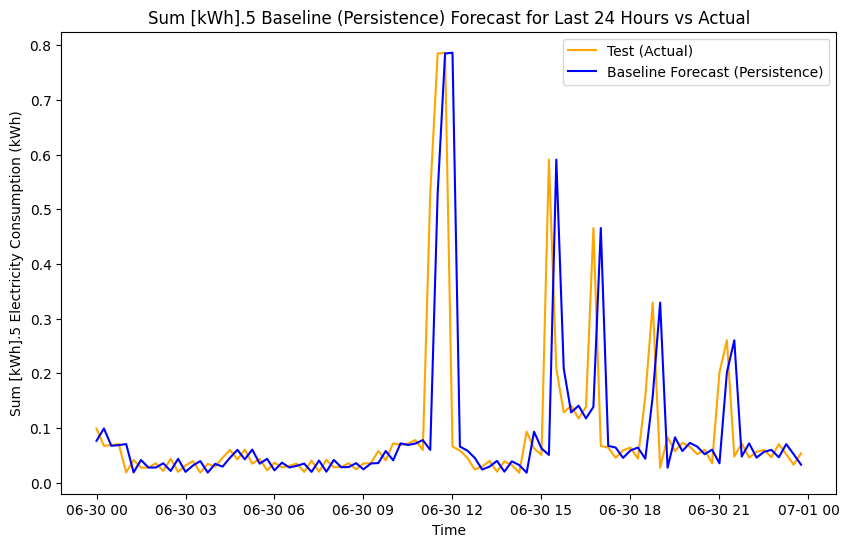

Processing Sum [kWh].6...


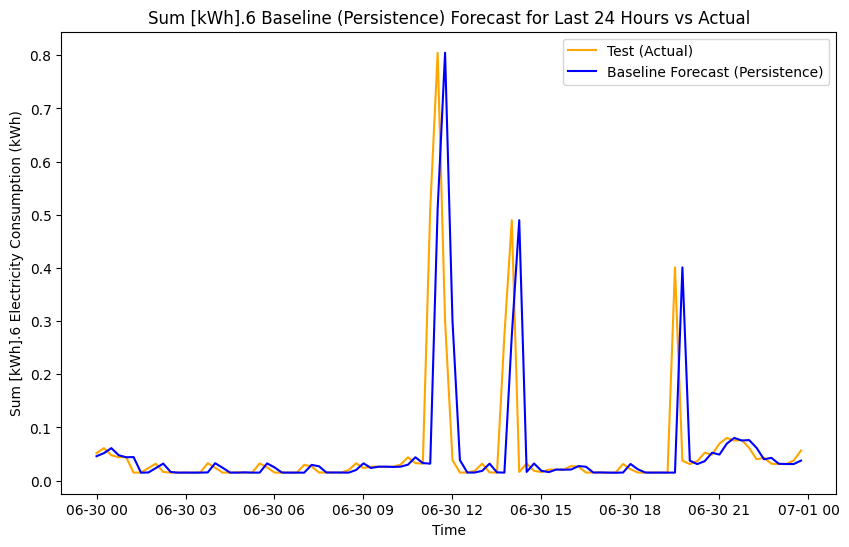

Processing Sum [kWh].7...


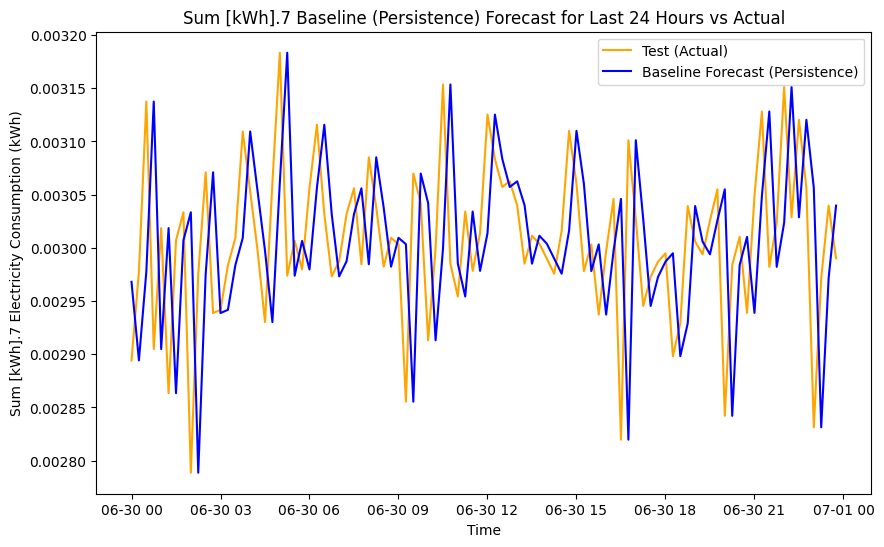

Processing Sum [kWh].8...


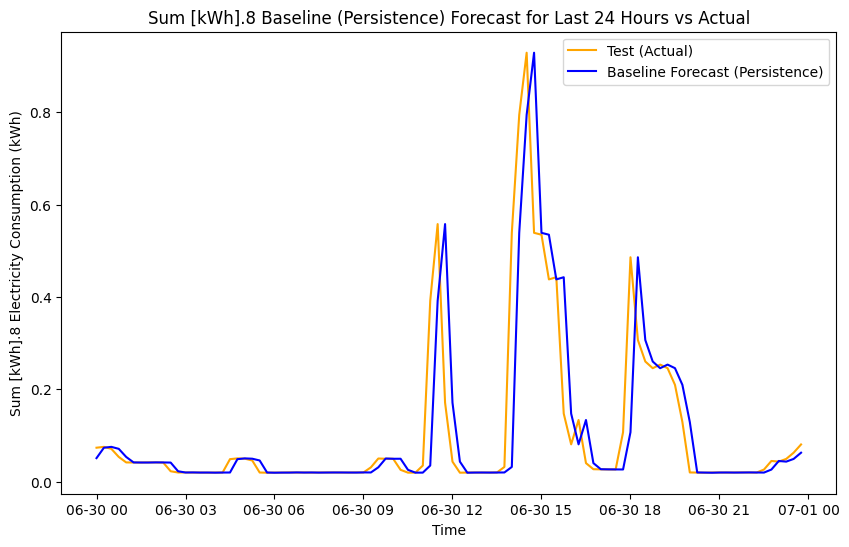

Processing Sum [kWh].9...


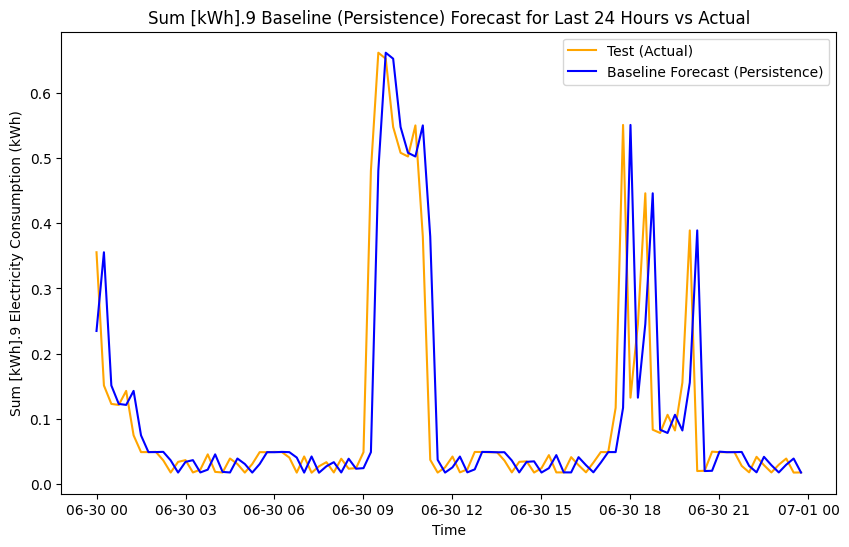

In [56]:
for household in household_columns:
    print(f"Processing {household}...")

    # Creating only lag-1 feature for the persistence model (last known value)
    df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep

    # Drop NaN values caused by shifting
    household_df = df[['Time', household, f'{household}_lag_1']].dropna()

    # Split the data
    train = household_df[:-last_24_hours]  # Training data (everything except last 24 hours)
    test = household_df[-last_24_hours:]   # Test data (last 24 hours)

    # Baseline model: persistence model (predict next value using the last known value)
    # Using the last known value from the train set for each step in the test set
    baseline_forecast = test[f'{household}_lag_1'].values  # Shift 1 (i.e., last known value)

    # Evaluate the baseline forecast using MAE and RMSE
    baseline_mae = mean_absolute_error(test[household], baseline_forecast)
    baseline_rmse = np.sqrt(mean_squared_error(test[household], baseline_forecast))

    # Store the results
    baseline_results[household] = {'MAE': baseline_mae, 'RMSE': baseline_rmse}

    # Plot the baseline forecast vs actual for this household (last 24 hours)
    plt.figure(figsize=(10, 6))
    plt.plot(test['Time'], test[household], label='Test (Actual)', color='orange')
    plt.plot(test['Time'], baseline_forecast, label='Baseline Forecast (Persistence)', color='blue')
    plt.xlabel('Time')
    plt.ylabel(f'{household} Electricity Consumption (kWh)')
    plt.title(f'{household} Baseline (Persistence) Forecast for Last 24 Hours vs Actual')
    plt.legend()
    plt.show()


In [57]:
# Output baseline results
for household, metrics in baseline_results.items():
    print(f"{household}: MAE = {metrics['MAE']}, RMSE = {metrics['RMSE']}")

Sum [kWh].0: MAE = 0.04384934155879338, RMSE = 0.09608022721747372
Sum [kWh].1: MAE = 0.04774877194095865, RMSE = 0.1269179338811737
Sum [kWh].2: MAE = 0.021532120987978205, RMSE = 0.06852107599623798
Sum [kWh].3: MAE = 9.421580835703332e-05, RMSE = 0.00011685213032740144
Sum [kWh].4: MAE = 0.03487469557253841, RMSE = 0.10802144627839219
Sum [kWh].5: MAE = 0.05740311911354843, RMSE = 0.1352716004028839
Sum [kWh].6: MAE = 0.03943211357615282, RMSE = 0.11483139811036981
Sum [kWh].7: MAE = 8.211321552913541e-05, RMSE = 0.00010338007365115766
Sum [kWh].8: MAE = 0.043922056828230936, RMSE = 0.10879027071842594
Sum [kWh].9: MAE = 0.05165092340157895, RMSE = 0.11225015841036656


## **ARIMA**

In [58]:
arima_results = {}

In [59]:
last_24_hours = 96

Processing Sum [kWh].0...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

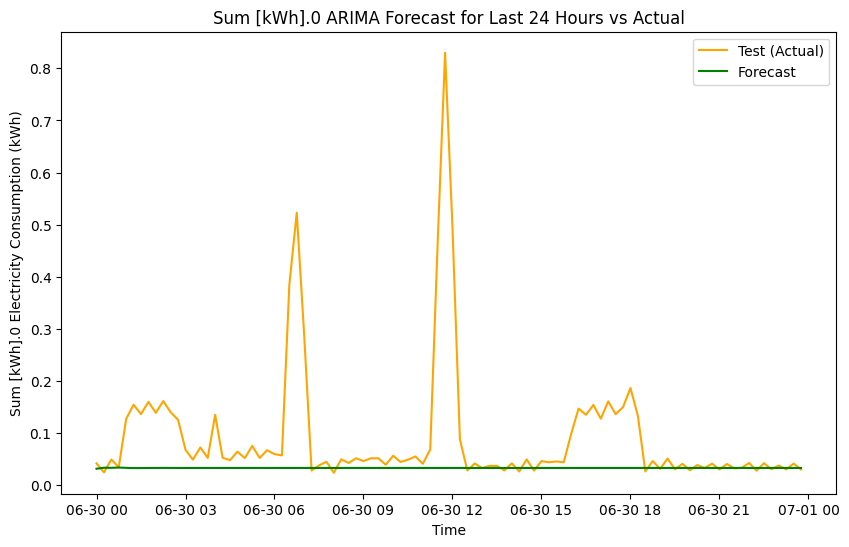

Processing Sum [kWh].1...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

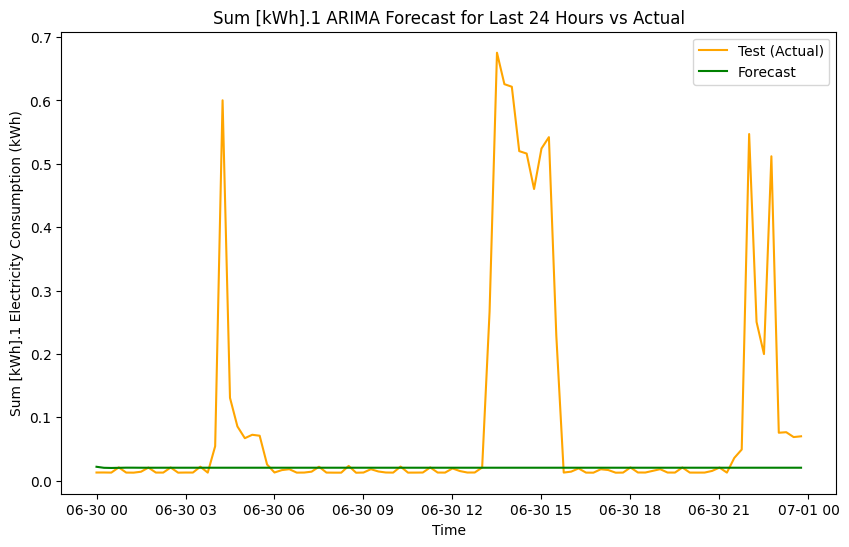

Processing Sum [kWh].2...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

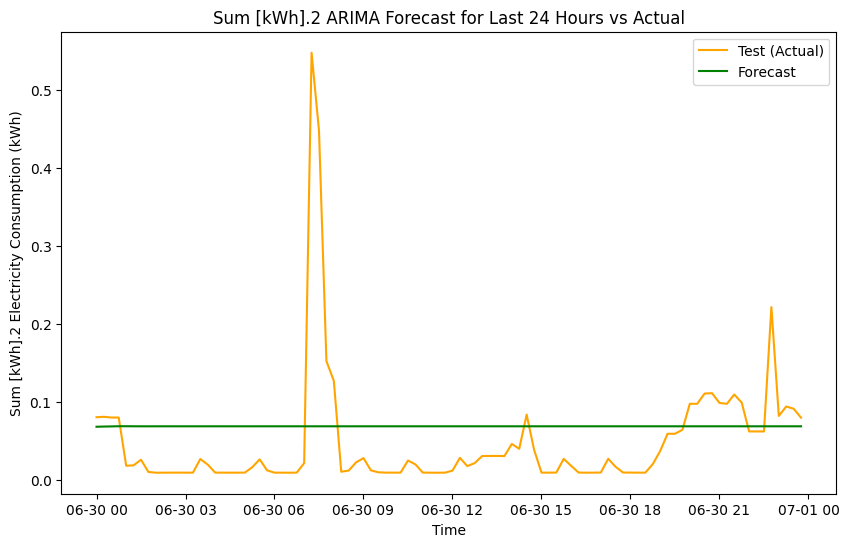

Processing Sum [kWh].3...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

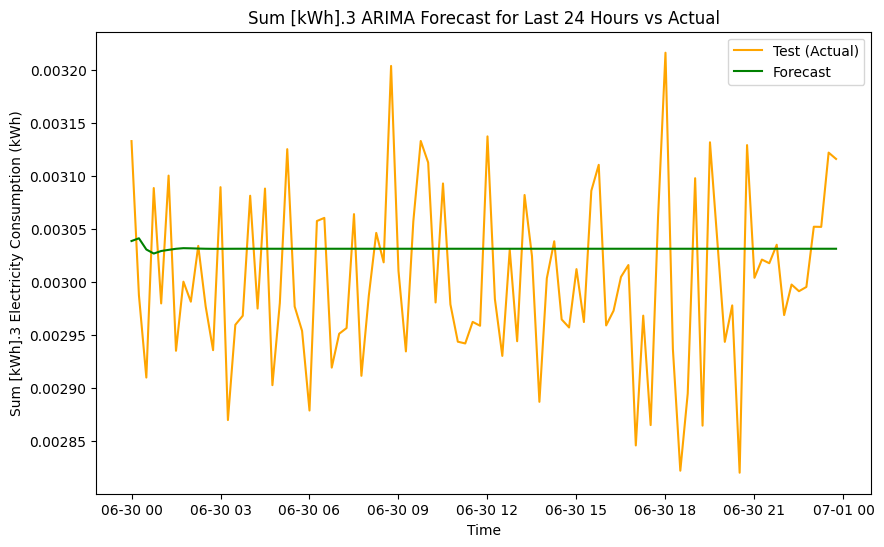

Processing Sum [kWh].4...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

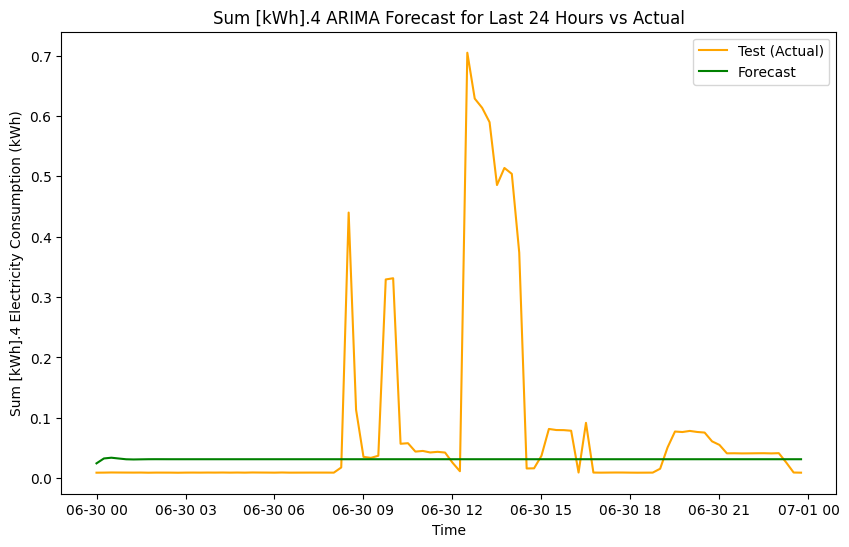

Processing Sum [kWh].5...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

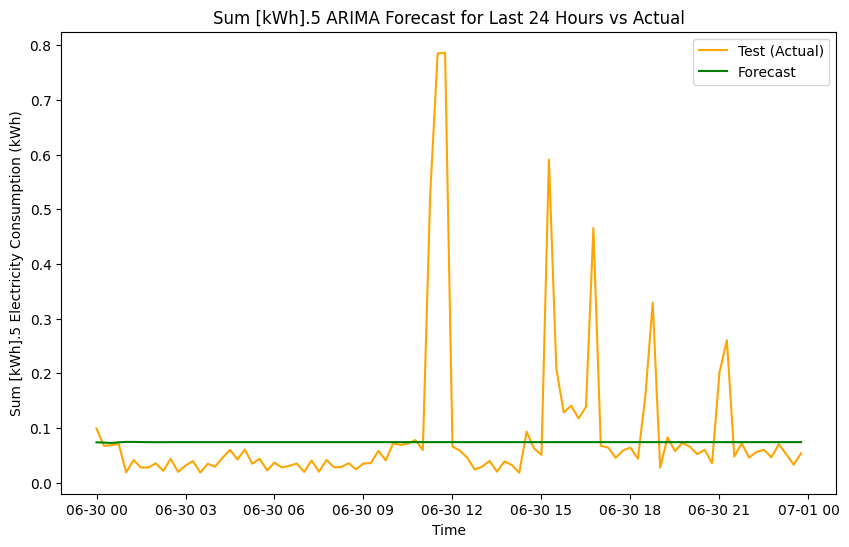

Processing Sum [kWh].6...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

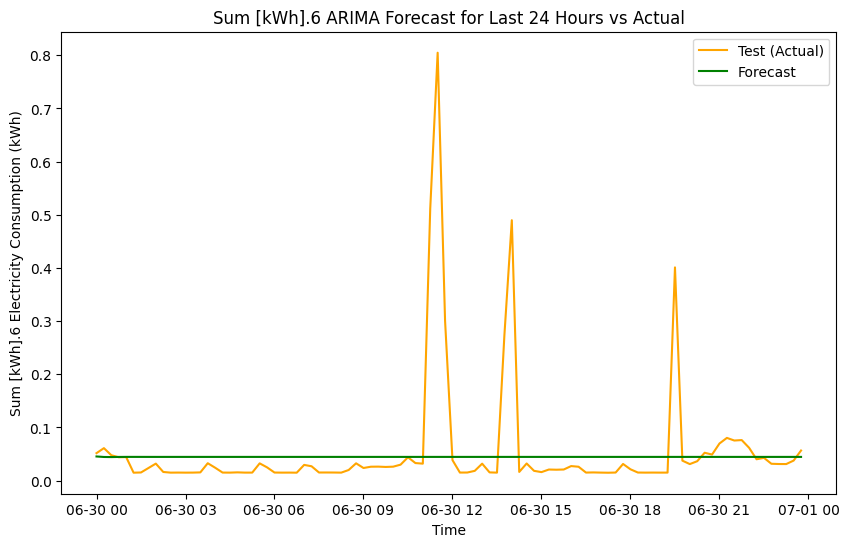

Processing Sum [kWh].7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

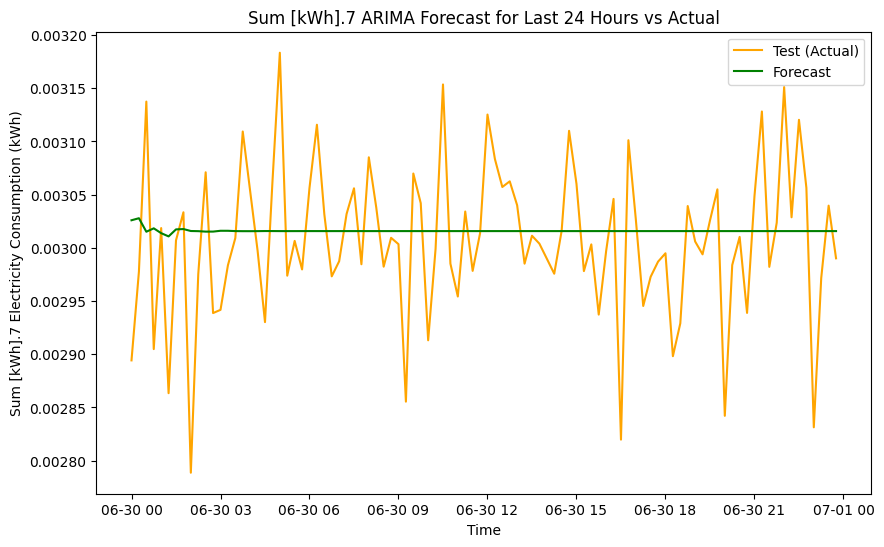

Processing Sum [kWh].8...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

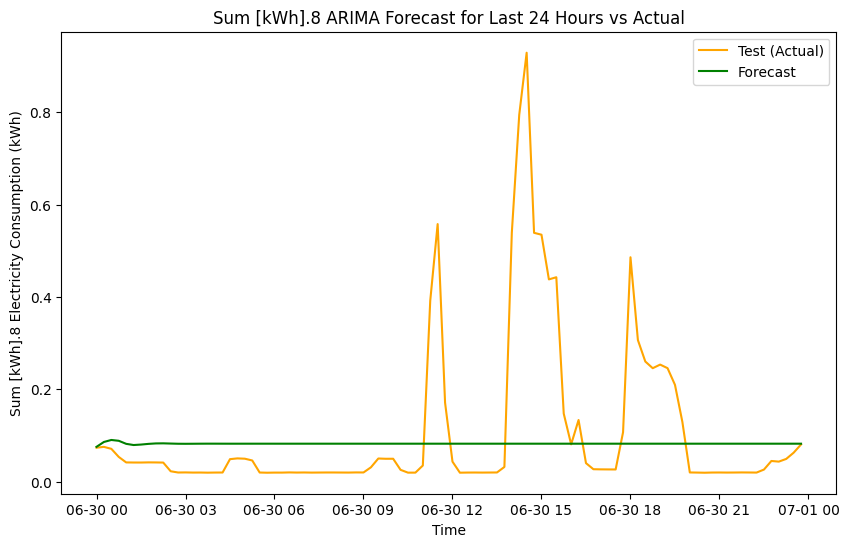

Processing Sum [kWh].9...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

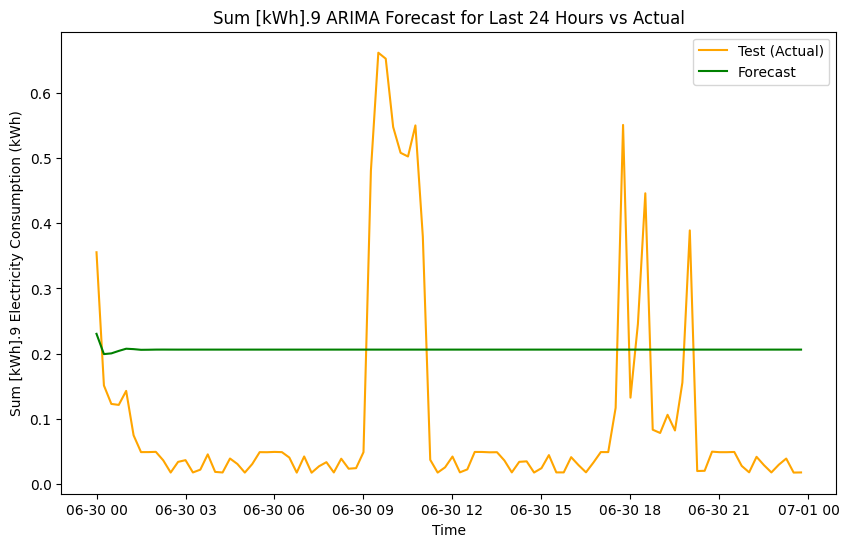

In [60]:
for household in household_columns:
    print(f"Processing {household}...")

    # Create lag and rolling features for the current household
    df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
    df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
    df[f'{household}_rolling_1h'] = df[household].rolling(window=4).mean()
    df[f'{household}_rolling_1d'] = df[household].rolling(window=96).mean()

    # Drop NaN values caused by lag/rolling
    household_df = df[['Time', household, f'{household}_lag_1', f'{household}_lag_4',
                       f'{household}_rolling_1h', f'{household}_rolling_1d']].dropna()

    # Split the data
    train = household_df[:-last_24_hours]  # Training data (everything except last 24 hours)
    test = household_df[-last_24_hours:]   # Test data (last 24 hours)

    # Train an ARIMA model for the household
    model = ARIMA(train[household], order=(5, 1, 0))  # Adjust ARIMA order as needed
    model_fit = model.fit()

    # Forecast the next 96 timesteps (last 24 hours)
    forecast = model_fit.forecast(steps=len(test))

    # Evaluate the forecast using MAE and RMSE
    mae = mean_absolute_error(test[household], forecast)
    rmse = np.sqrt(mean_squared_error(test[household], forecast))

    # Store the results
    arima_results[household] = {'MAE': mae, 'RMSE': rmse}

    # Plot the forecast vs actual for this household (last 24 hours)
    plt.figure(figsize=(10,6))
    #plt.plot(train['Time'], train[household], label='Train')
    plt.plot(test['Time'], test[household], label='Test (Actual)', color='orange')
    plt.plot(test['Time'], forecast, label='Forecast', color='green')
    plt.xlabel('Time')
    plt.ylabel(f'{household} Electricity Consumption (kWh)')
    plt.title(f'{household} ARIMA Forecast for Last 24 Hours vs Actual')
    plt.legend()
    plt.show()

In [22]:
for household, metrics in arima_results.items():
    print(f"{household}: MAE = {metrics['MAE']}, RMSE = {metrics['RMSE']}")

Sum [kWh].0: MAE = 0.06021576333995408, RMSE = 0.13372289986185013
Sum [kWh].1: MAE = 0.08110092013800058, RMSE = 0.1897111046467239
Sum [kWh].2: MAE = 0.05380180115271582, RMSE = 0.0798511538801678
Sum [kWh].3: MAE = 7.090788973807884e-05, RMSE = 8.543121265962243e-05
Sum [kWh].4: MAE = 0.07395786733297911, RMSE = 0.16598852490837016
Sum [kWh].5: MAE = 0.06440888528599405, RMSE = 0.1401367998129177
Sum [kWh].6: MAE = 0.04587326366716705, RMSE = 0.11580183620848551
Sum [kWh].7: MAE = 5.4990660795053374e-05, RMSE = 7.372044159950674e-05
Sum [kWh].8: MAE = 0.10341301228372242, RMSE = 0.1767169289382851
Sum [kWh].9: MAE = 0.17671565746398823, RMSE = 0.18836904866341878


Comment

For households like Sum [kWh].3 and Sum [kWh].7, the model is performing exceptionally well, with errors close to zero, implying that the ARIMA model has captured the consumption pattern very effectively.

For households like Sum [kWh].9, Sum [kWh].8, and Sum [kWh].1, the error values are notably higher. For instance, an MAE of 0.17 kWh and RMSE of 0.18 kWh for Sum [kWh].9 suggest that there is room for improvement.

In [61]:
from xgboost import XGBRegressor

In [62]:
xgb_results = {}

In [63]:
df.columns = df.columns.str.replace(r'[^\w]', '_', regex=True)

In [64]:
household_columns = [col for col in df.columns if col.startswith('Sum_')]

In [65]:
df.head()

Electricity_Timestep                Time  Sum__kWh__0  Sum__kWh__1  \
0                     0 2022-01-01 00:00:00     0.041346     0.066354   
1                    15 2022-01-01 00:15:00     0.024794     0.067132   
2                    30 2022-01-01 00:30:00     0.043701     0.066478   
3                    45 2022-01-01 00:45:00     0.043374     0.076322   
4                    60 2022-01-01 01:00:00     0.023892     0.066500   

   Sum__kWh__2  Sum__kWh__3  Sum__kWh__4  Sum__kWh__5  Sum__kWh__6  \
0     0.072797     0.002957     0.040572     0.044009     0.056274   
1     0.091674     0.003018     0.009139     0.046210     0.040607   
2     0.081484     0.002890     0.009055     0.023968     0.040729   
3     0.074713     0.002990     0.009225     0.044659     0.022517   
4     0.074037     0.002914     0.009189     0.026412     0.019049   

   Sum__kWh__7  ...  Sum__kWh__6_rolling_1d  Sum__kWh__7_lag_4  \
0     0.003023  ...                     NaN                NaN   
1     0.003114  ...                     NaN                NaN   
2     0.002963  ...                     NaN                NaN   
3     0.003052  ...                     NaN                NaN   
4     0.003063  ...                     NaN           0.003023   

   Sum__kWh__7_rolling_1h  Sum__kWh__7_rolling_1d  Sum__kWh__8_lag_4  \
0                     NaN                     NaN                NaN   
1                     NaN                     NaN                NaN   
2                     NaN                     NaN                NaN   
3                0.003038                     NaN                NaN   
4                0.003048                     NaN            0.07469   

   Sum__kWh__8_rolling_1h  Sum__kWh__8_rolling_1d  Sum__kWh__9_lag_4  \
0                     NaN                     NaN                NaN   
1                     NaN                     NaN                NaN   
2                     NaN                     NaN                NaN   
3                0.058458                     NaN                NaN   
4                0.052517                     NaN           0.103507   

   Sum__kWh__9_rolling_1h  Sum__kWh__9_rolling_1d  
0                     NaN                     NaN  
1                     NaN                     NaN  
2                     NaN                     NaN  
3                0.087035                     NaN  
4                0.065499                     NaN  

[5 rows x 56 columns]

Processing Sum__kWh__0...


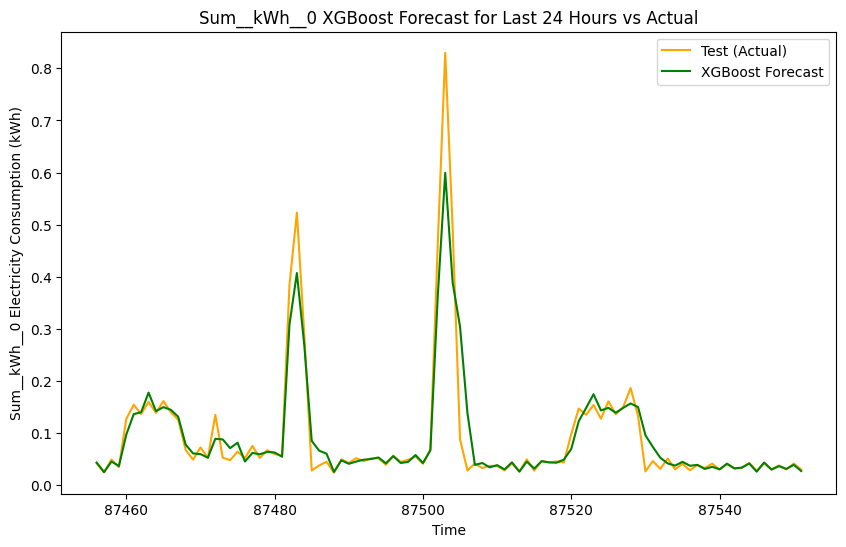

Processing Sum__kWh__1...


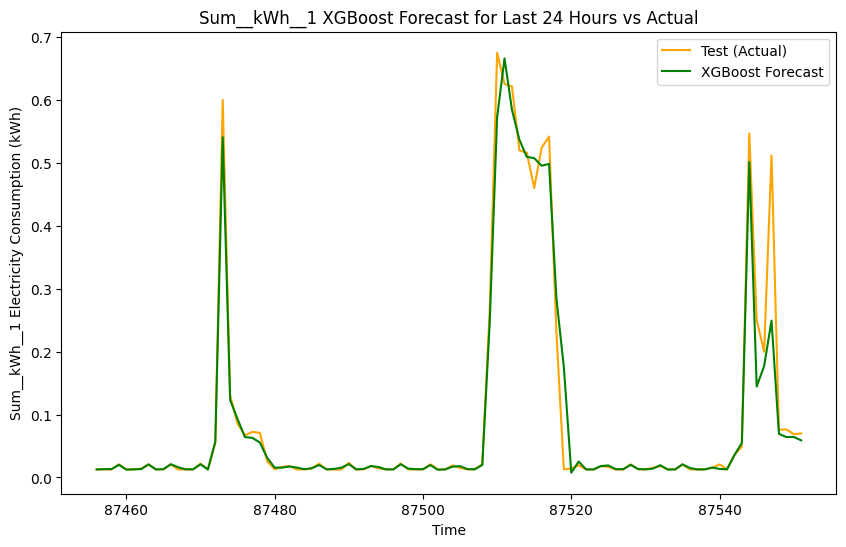

Processing Sum__kWh__2...


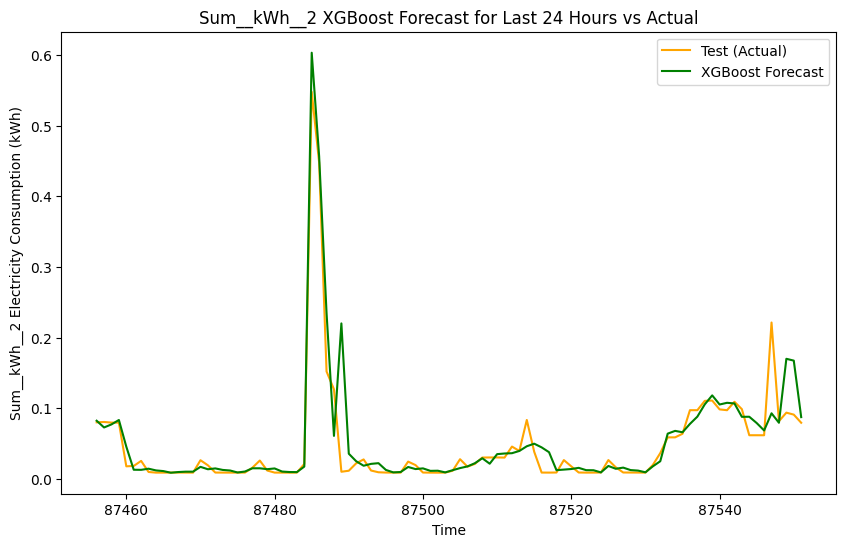

Processing Sum__kWh__3...


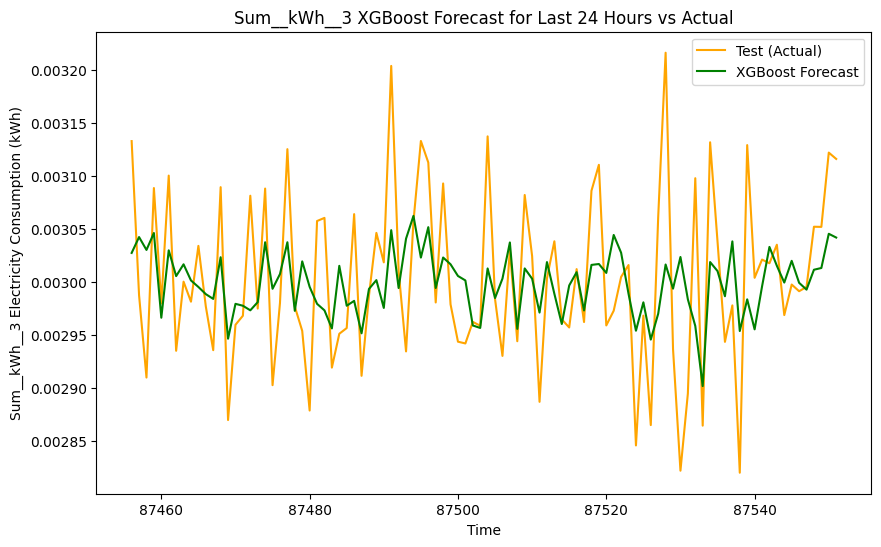

Processing Sum__kWh__4...


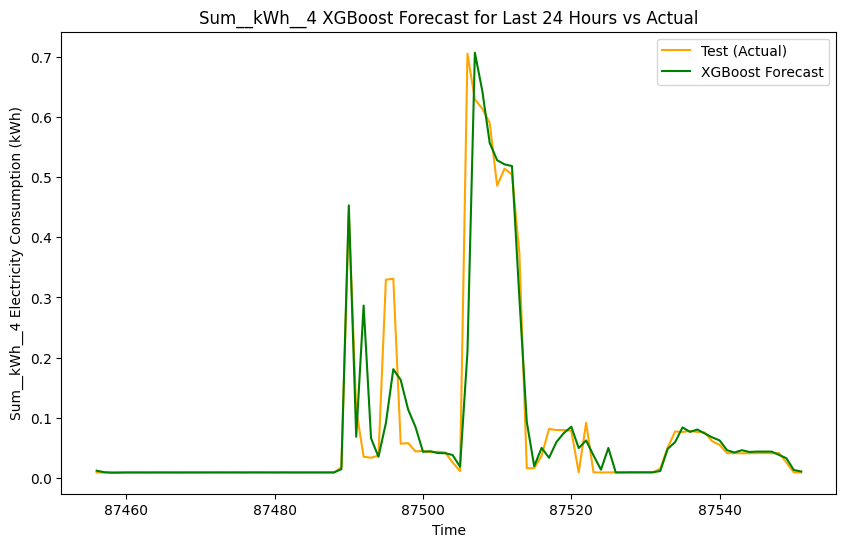

Processing Sum__kWh__5...


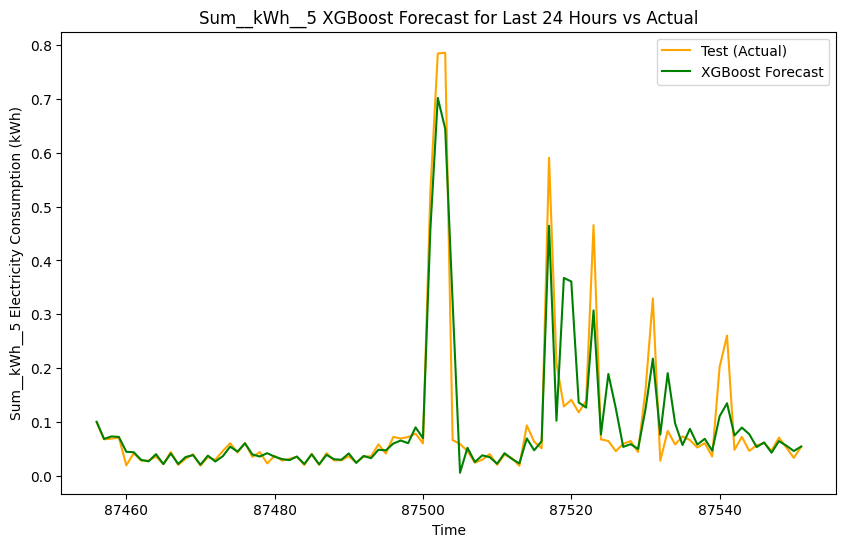

Processing Sum__kWh__6...


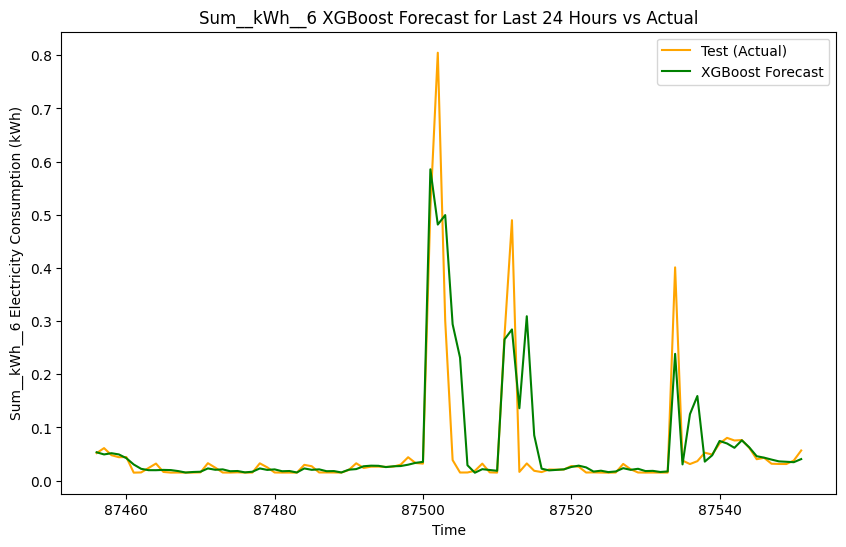

Processing Sum__kWh__7...


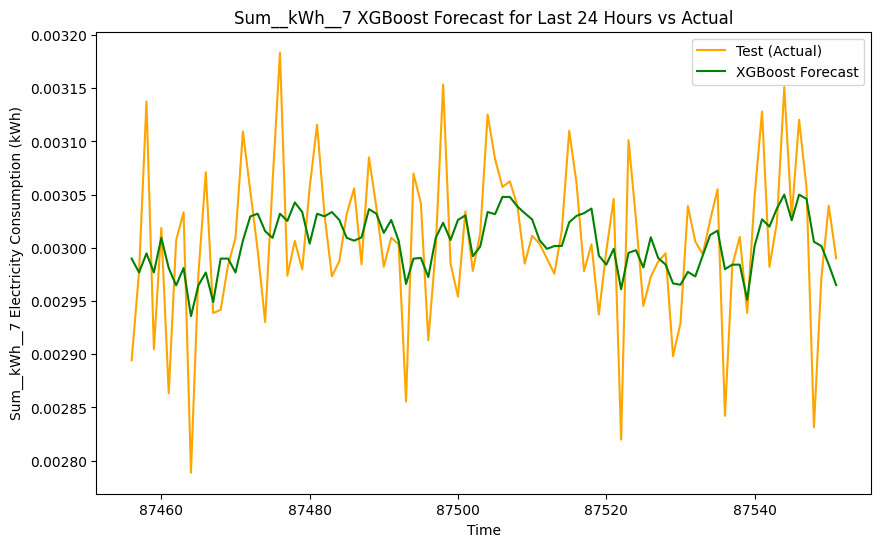

Processing Sum__kWh__8...


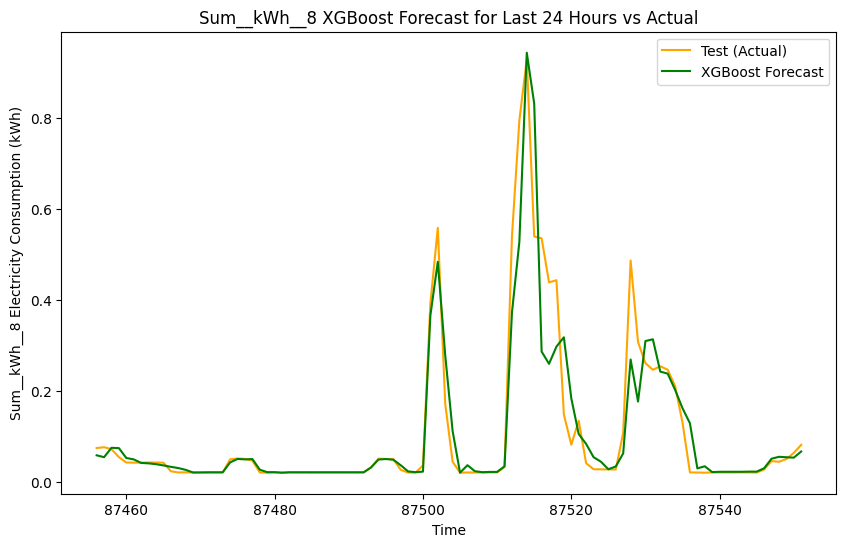

Processing Sum__kWh__9...


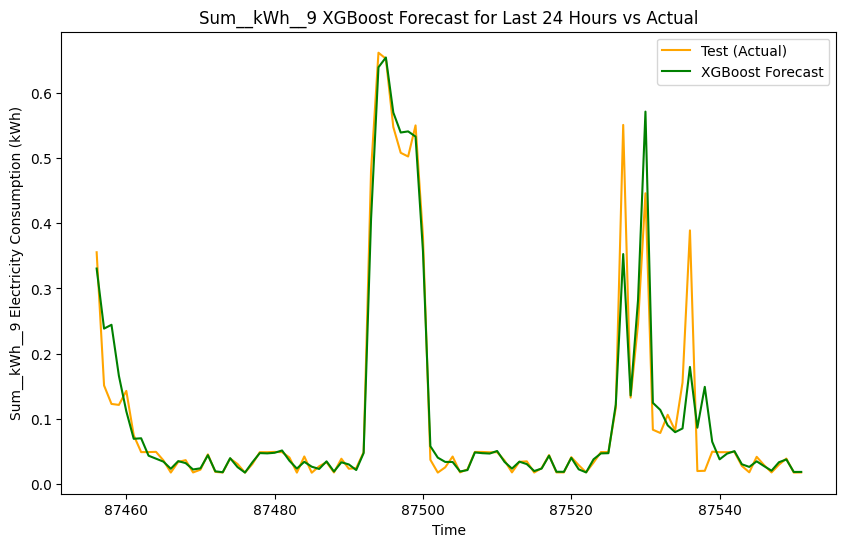

Processing Sum__kWh__0_lag_1...


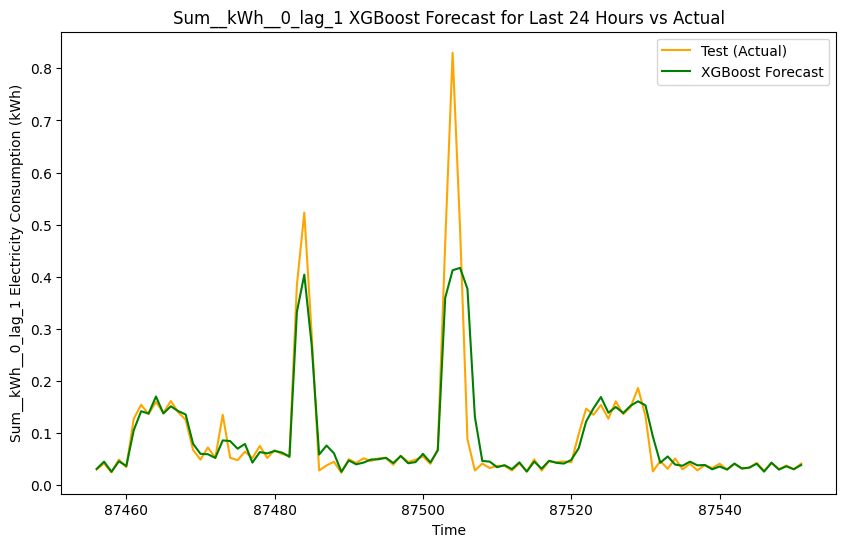

Processing Sum__kWh__1_lag_1...


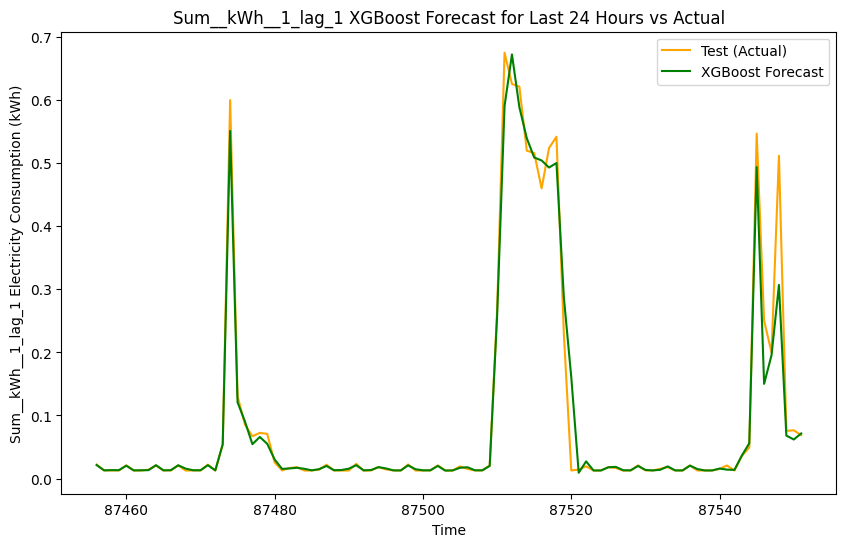

Processing Sum__kWh__2_lag_1...


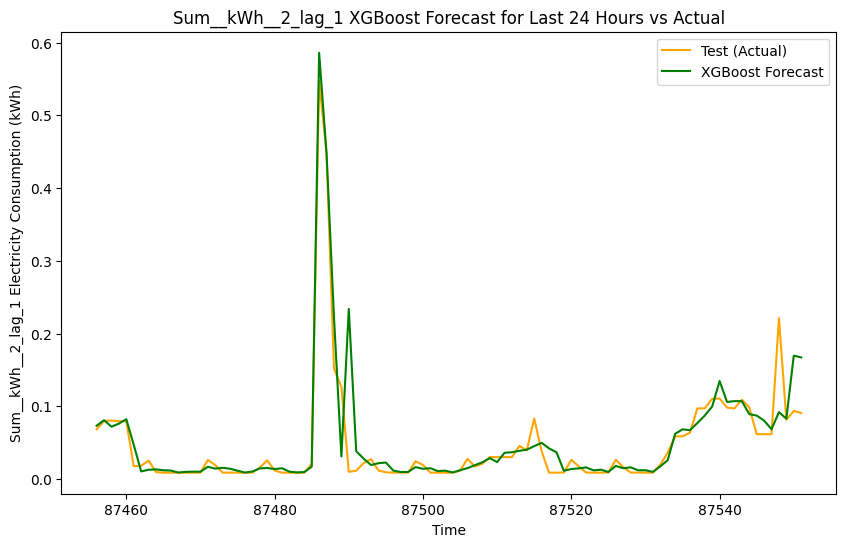

Processing Sum__kWh__3_lag_1...


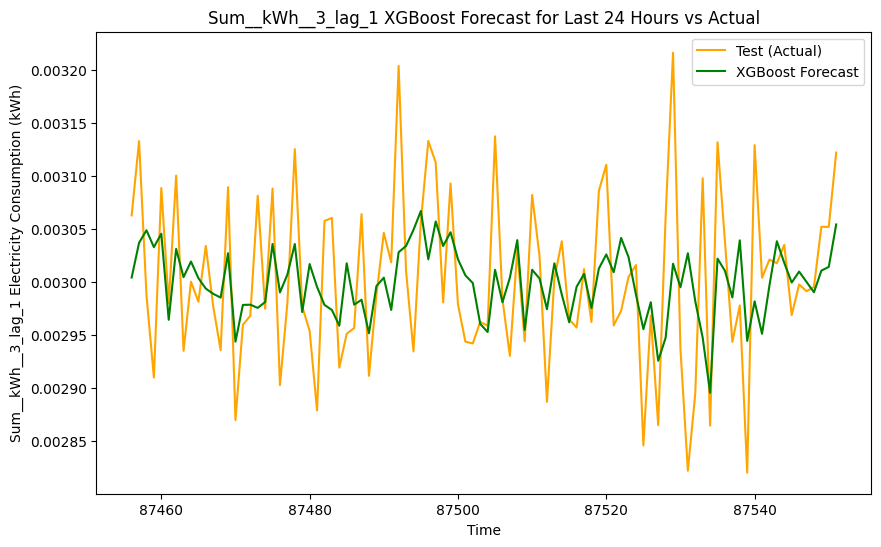

Processing Sum__kWh__4_lag_1...


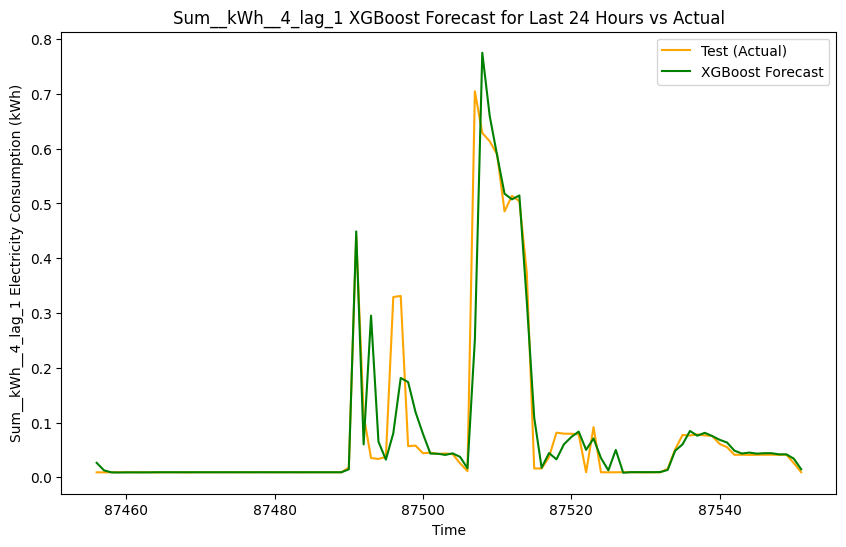

Processing Sum__kWh__5_lag_1...


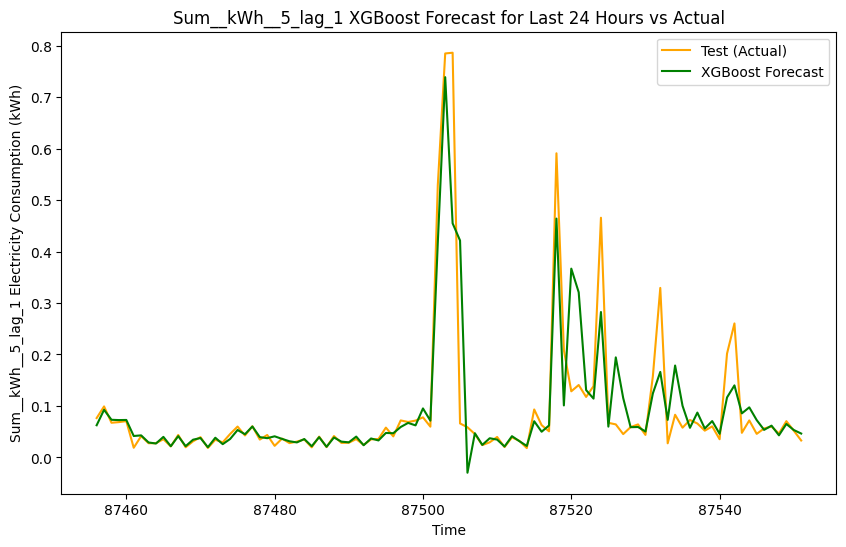

Processing Sum__kWh__6_lag_1...


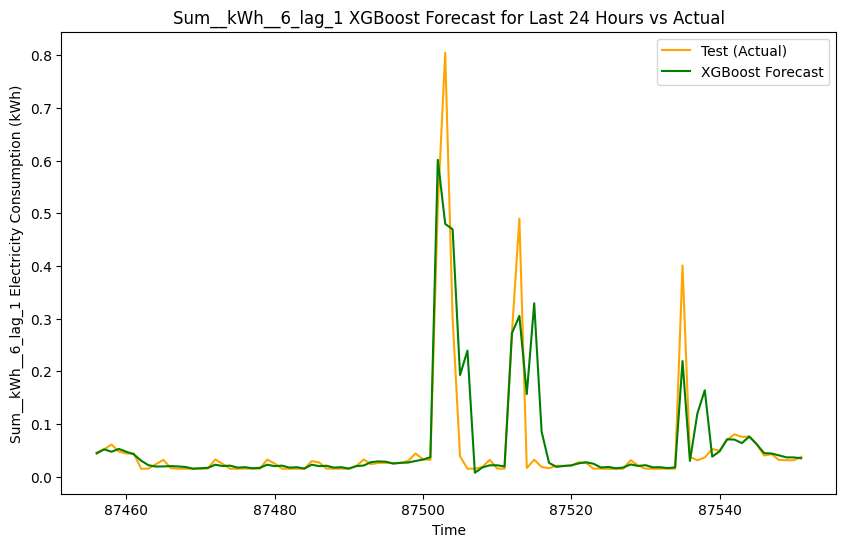

Processing Sum__kWh__7_lag_1...


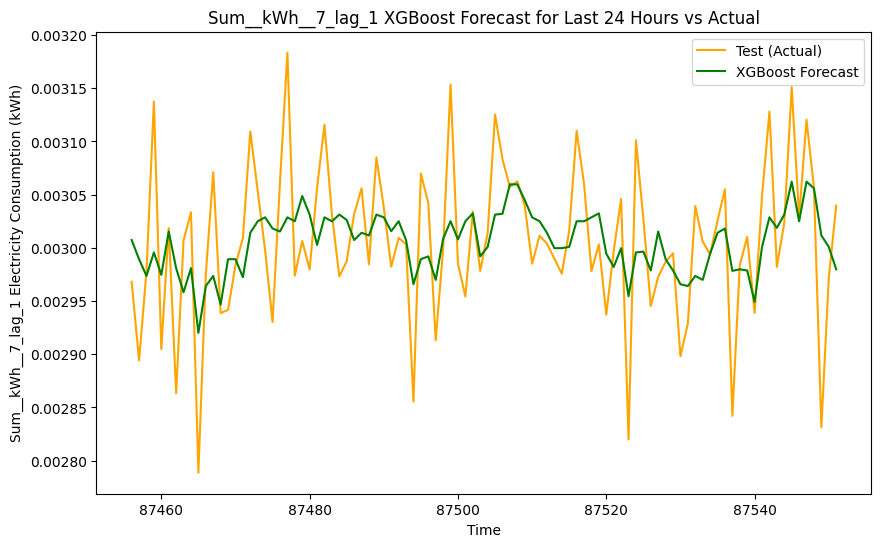

Processing Sum__kWh__8_lag_1...


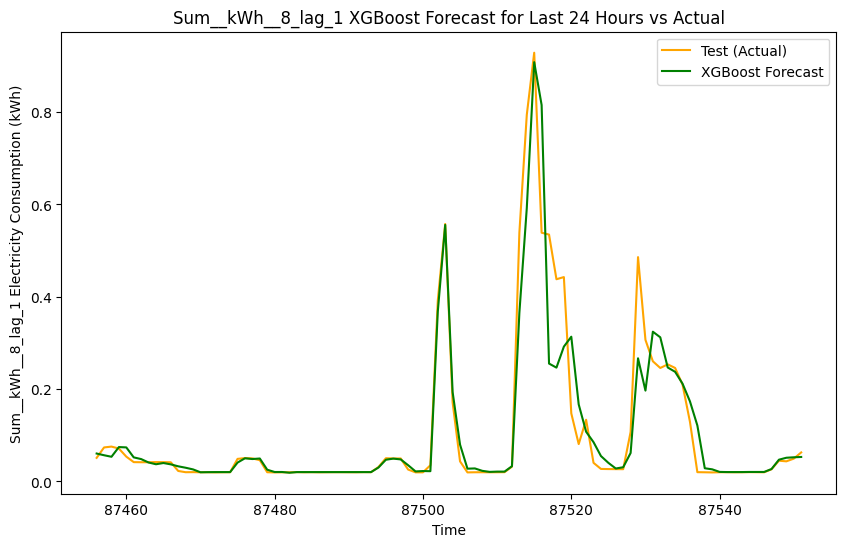

Processing Sum__kWh__9_lag_1...


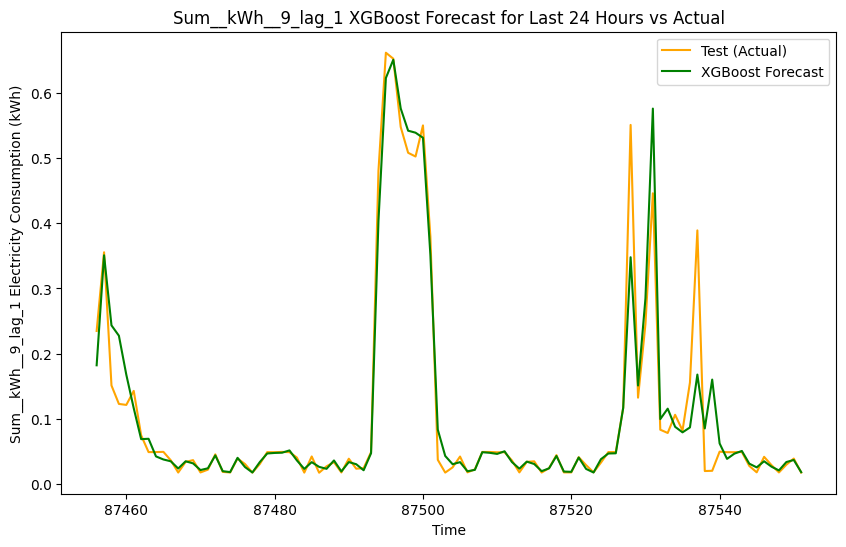

Processing Sum__kWh__0_lag_4...


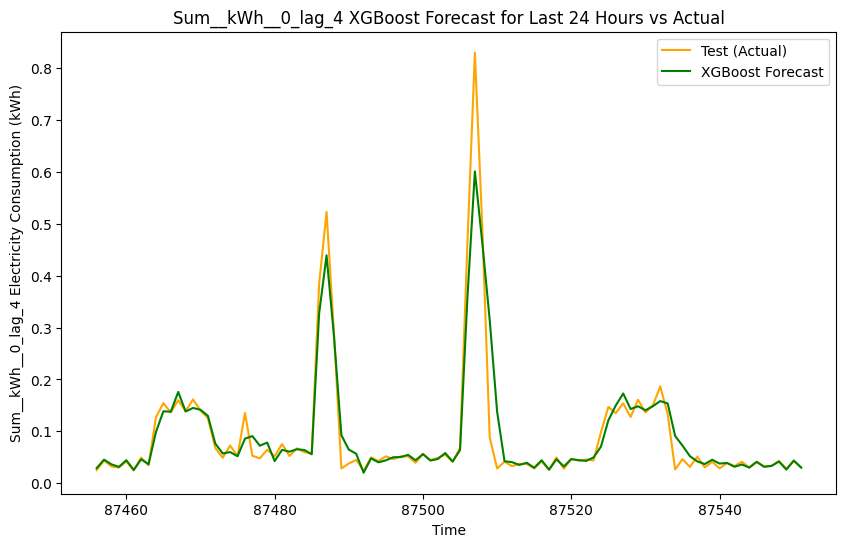

Processing Sum__kWh__0_rolling_1h...


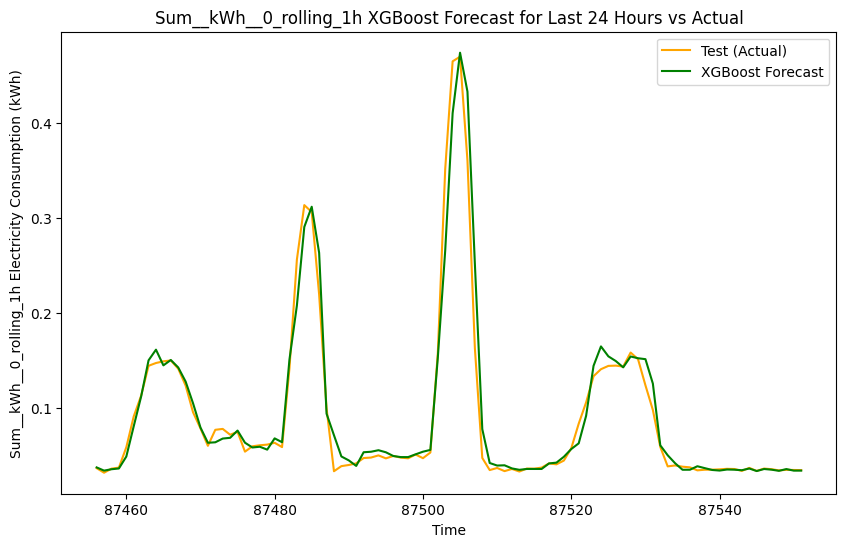

Processing Sum__kWh__0_rolling_1d...


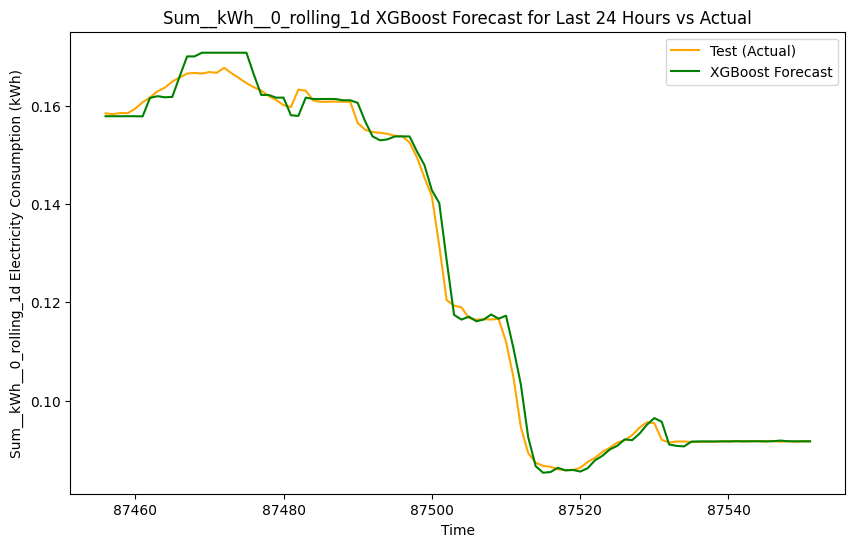

Processing Sum__kWh__1_lag_4...


<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_rolling_1h'] = df[household].rolling(window=4).mean()
<ipython-input-66-b03b909b0bd4>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

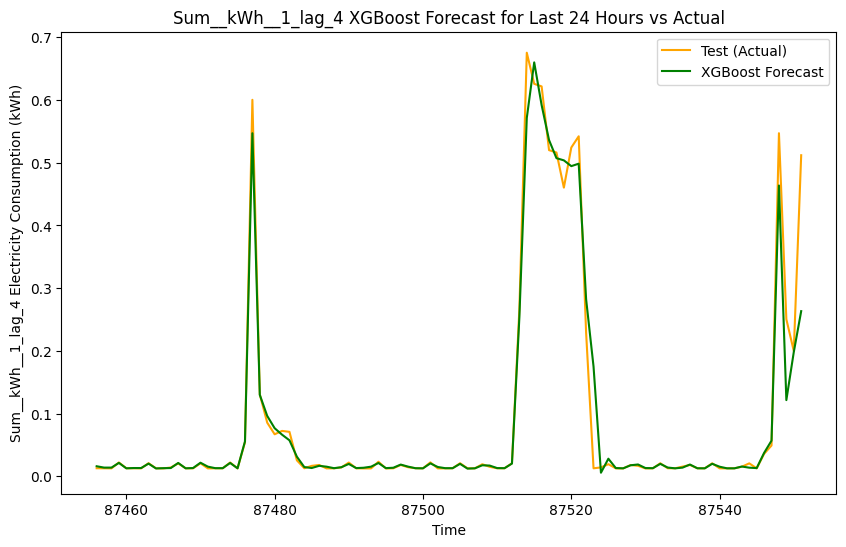

Processing Sum__kWh__1_rolling_1h...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

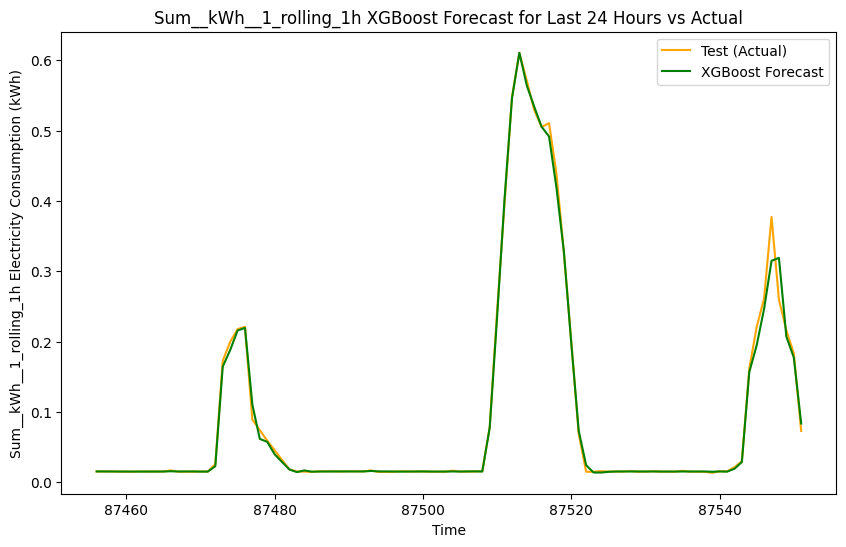

Processing Sum__kWh__1_rolling_1d...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

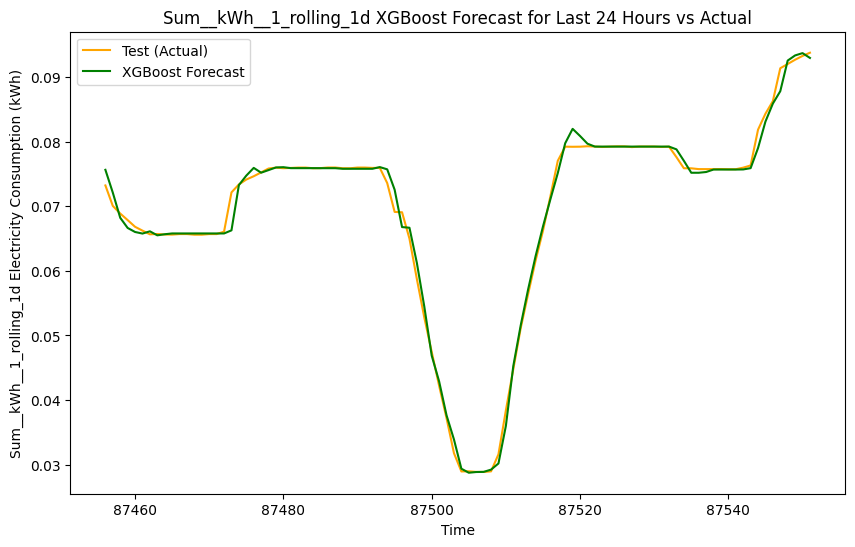

Processing Sum__kWh__2_lag_4...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

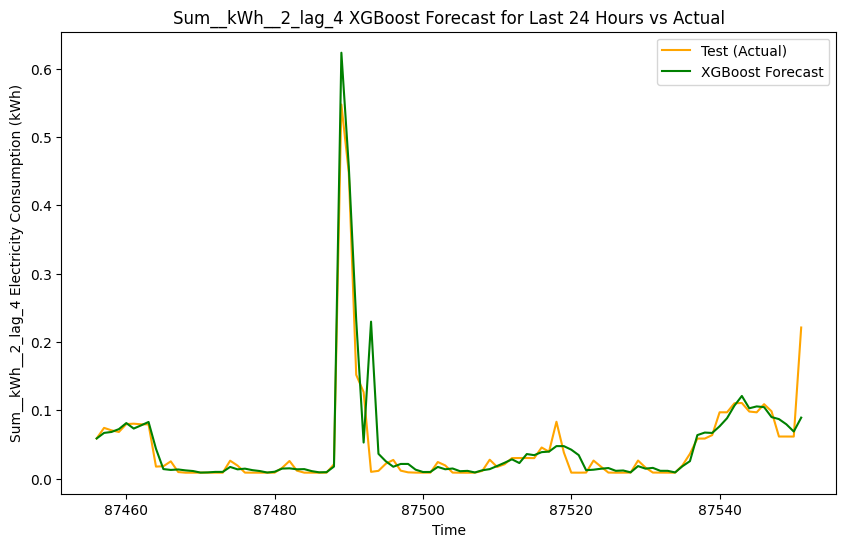

Processing Sum__kWh__2_rolling_1h...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

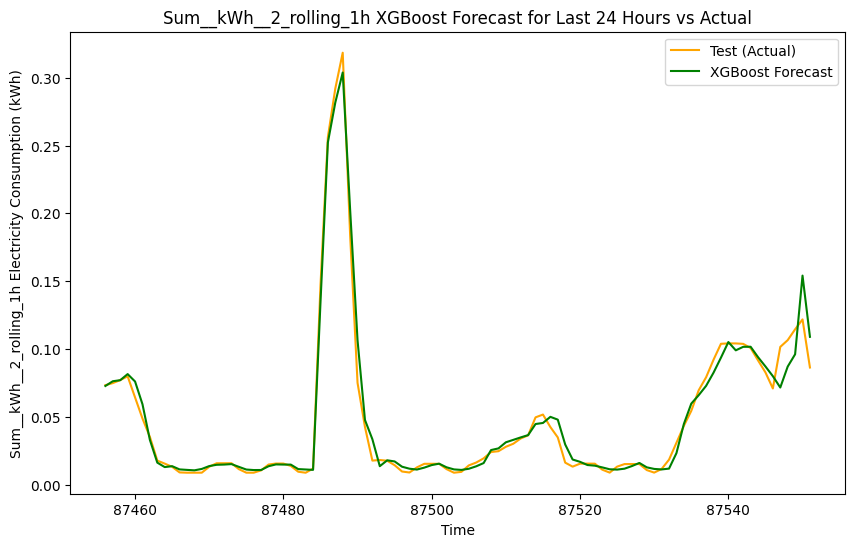

Processing Sum__kWh__2_rolling_1d...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

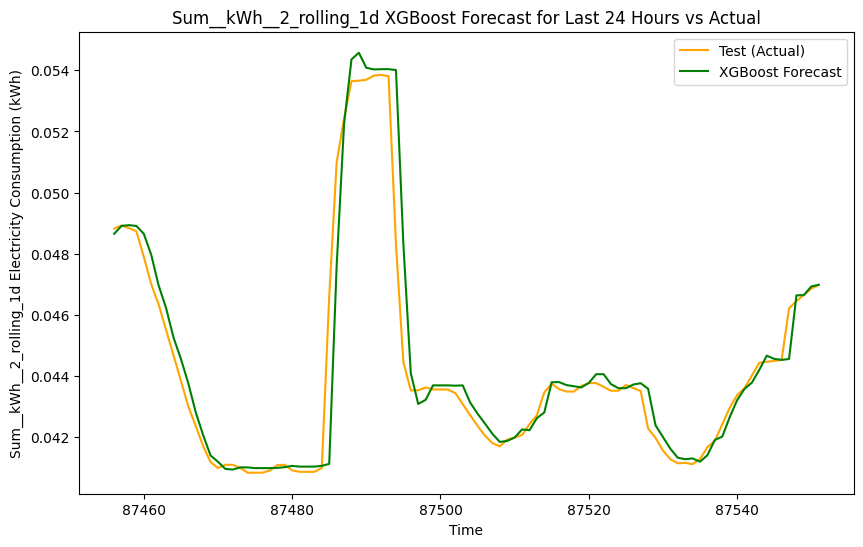

Processing Sum__kWh__3_lag_4...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

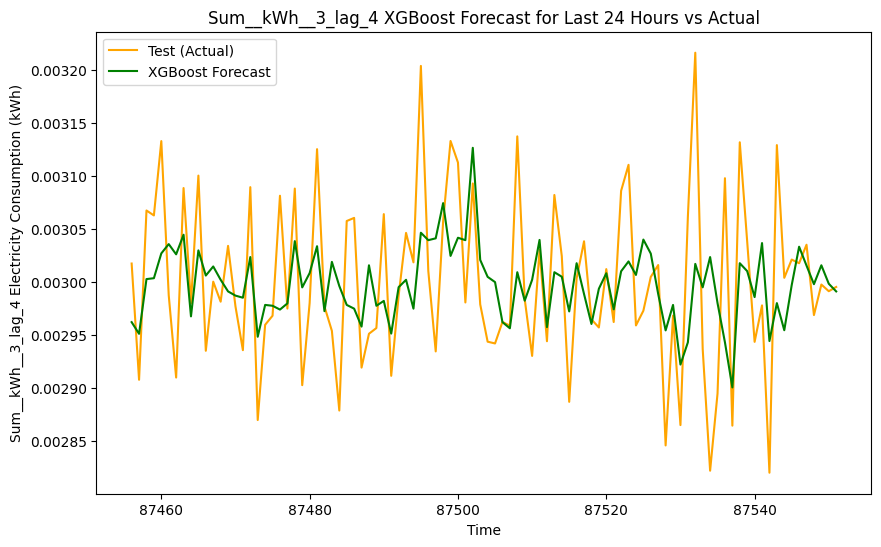

Processing Sum__kWh__3_rolling_1h...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

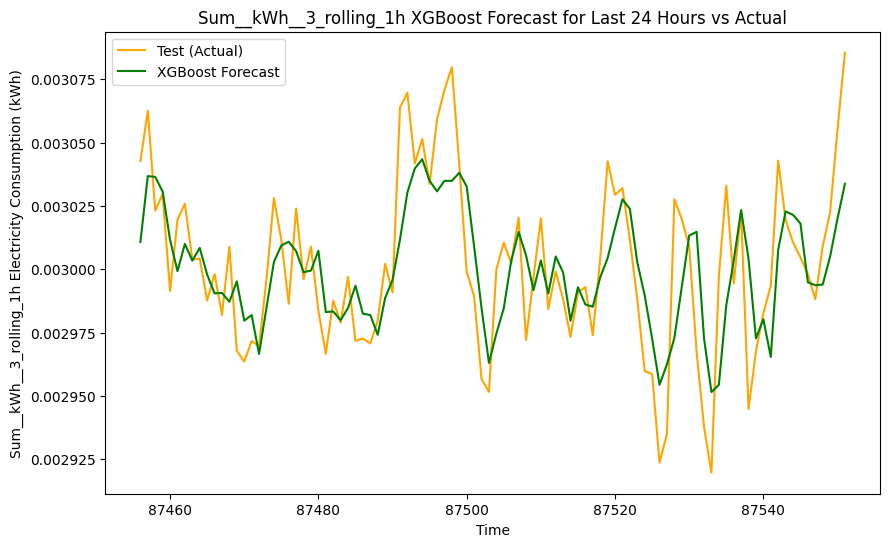

Processing Sum__kWh__3_rolling_1d...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

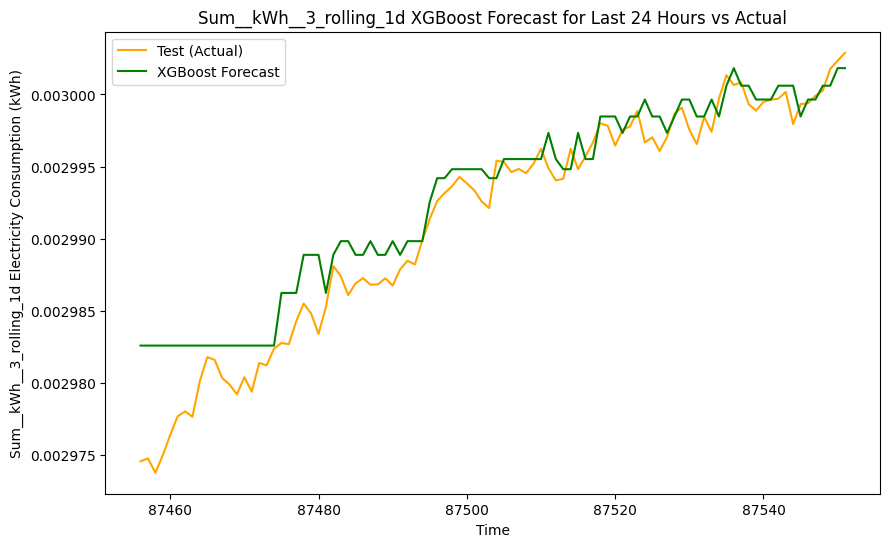

Processing Sum__kWh__4_lag_4...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

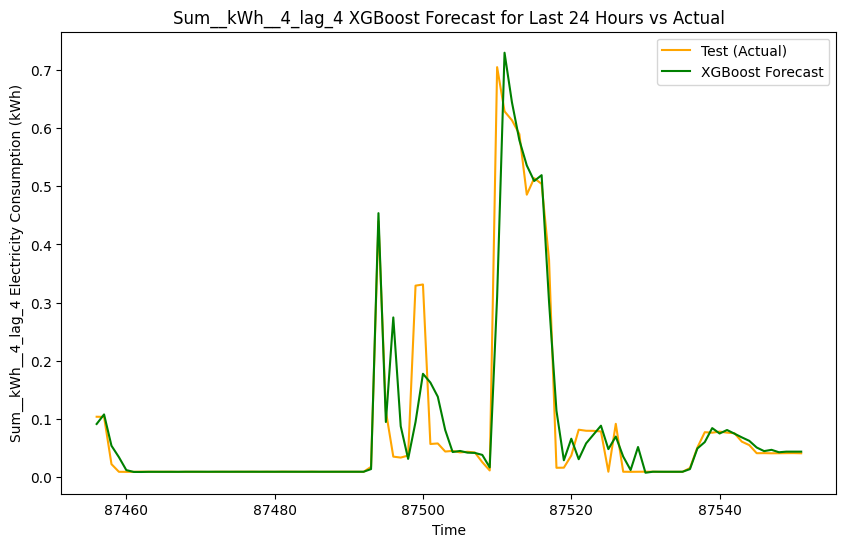

Processing Sum__kWh__4_rolling_1h...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

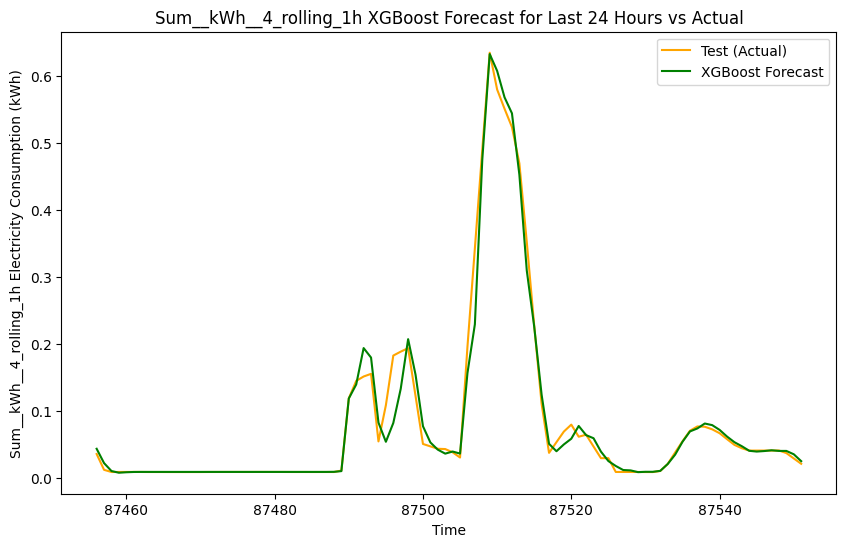

Processing Sum__kWh__4_rolling_1d...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

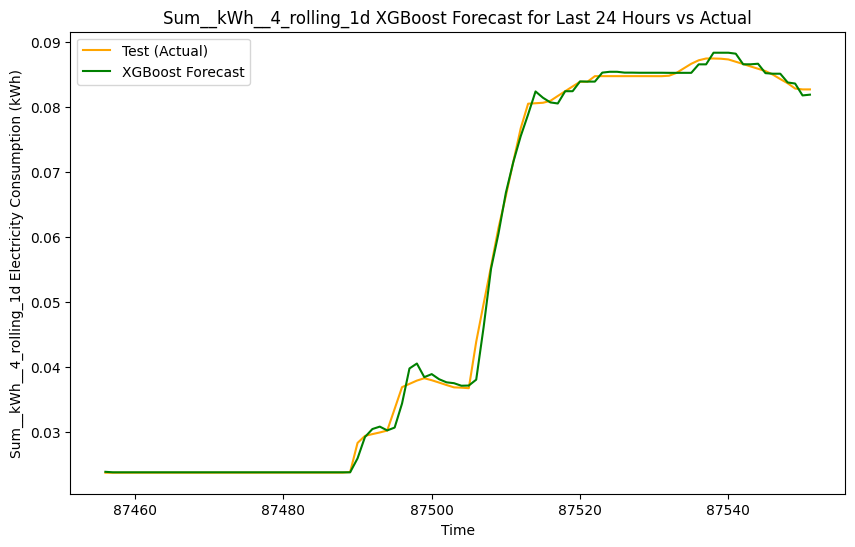

Processing Sum__kWh__5_lag_4...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

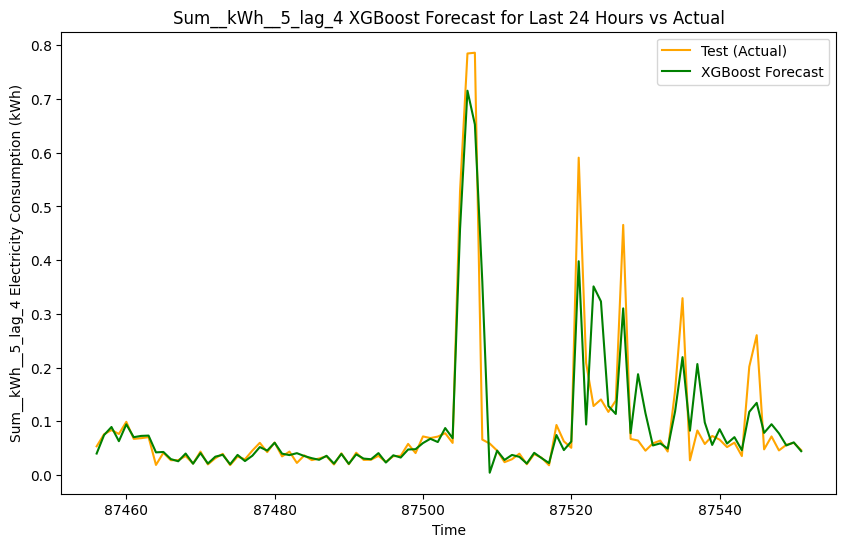

Processing Sum__kWh__5_rolling_1h...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

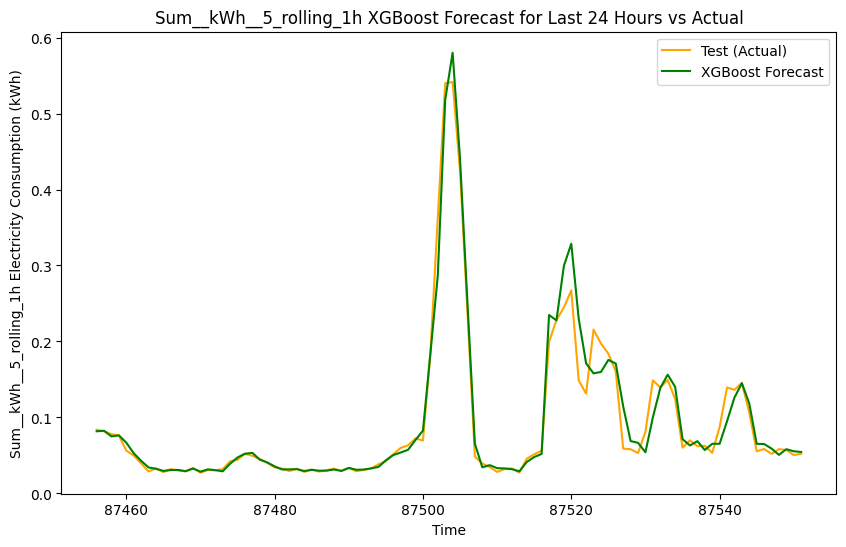

Processing Sum__kWh__5_rolling_1d...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

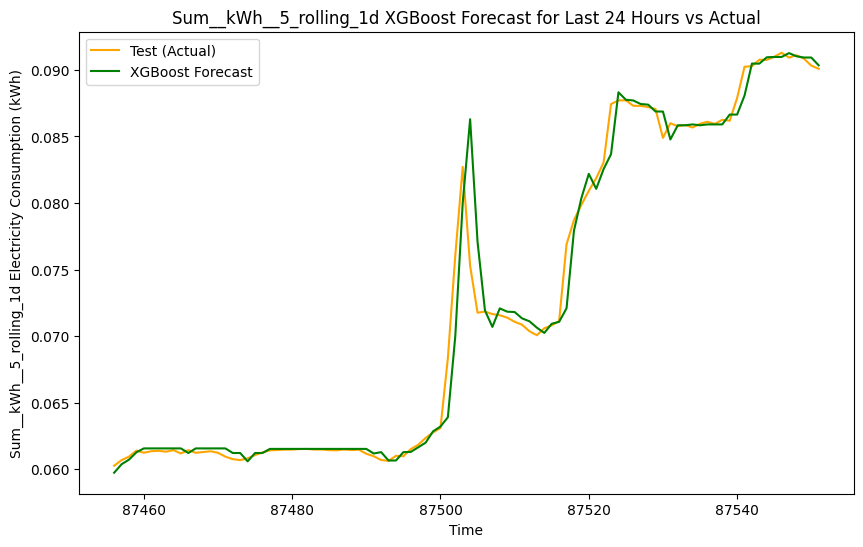

Processing Sum__kWh__6_lag_4...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

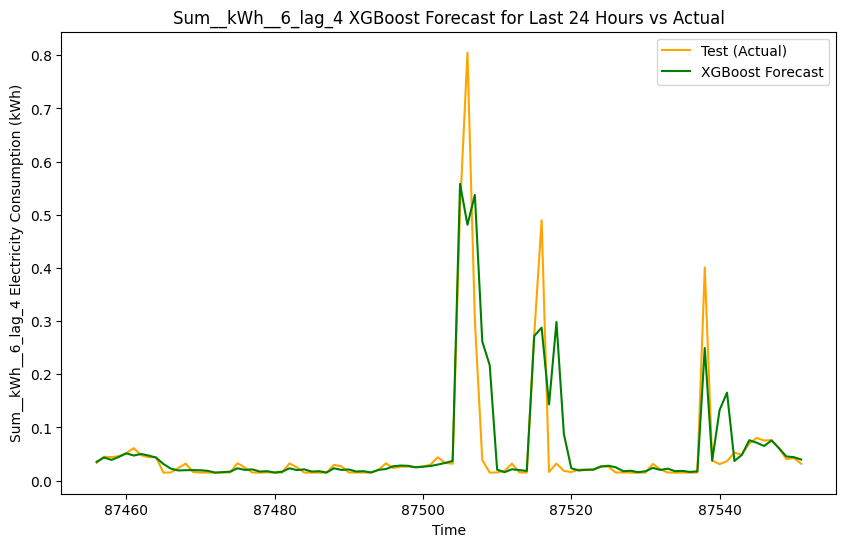

Processing Sum__kWh__6_rolling_1h...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

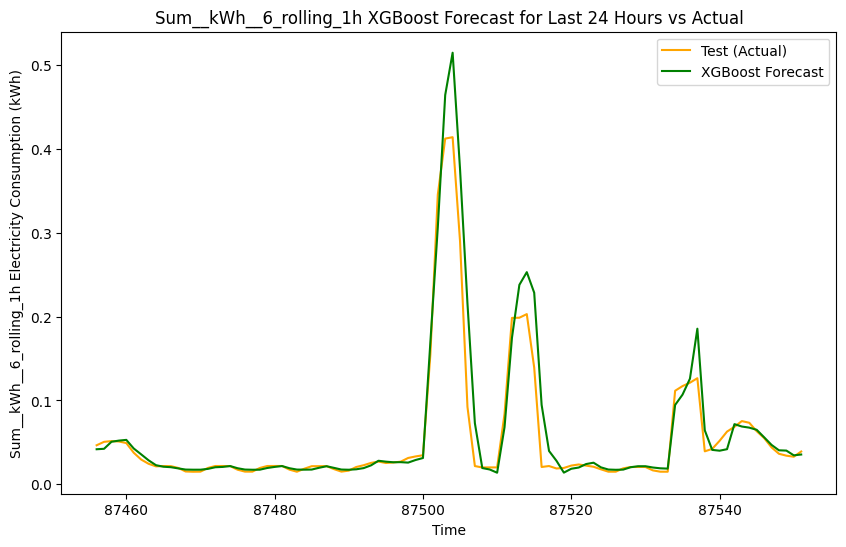

Processing Sum__kWh__6_rolling_1d...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

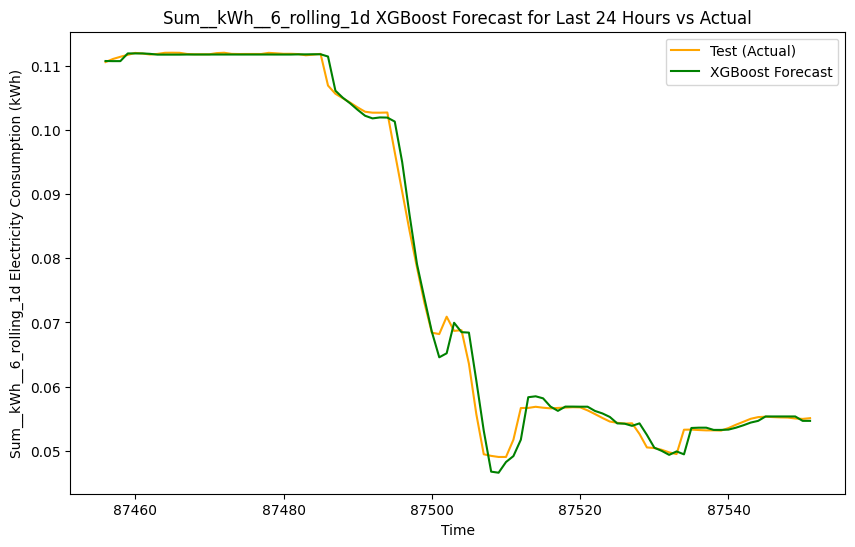

Processing Sum__kWh__7_lag_4...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

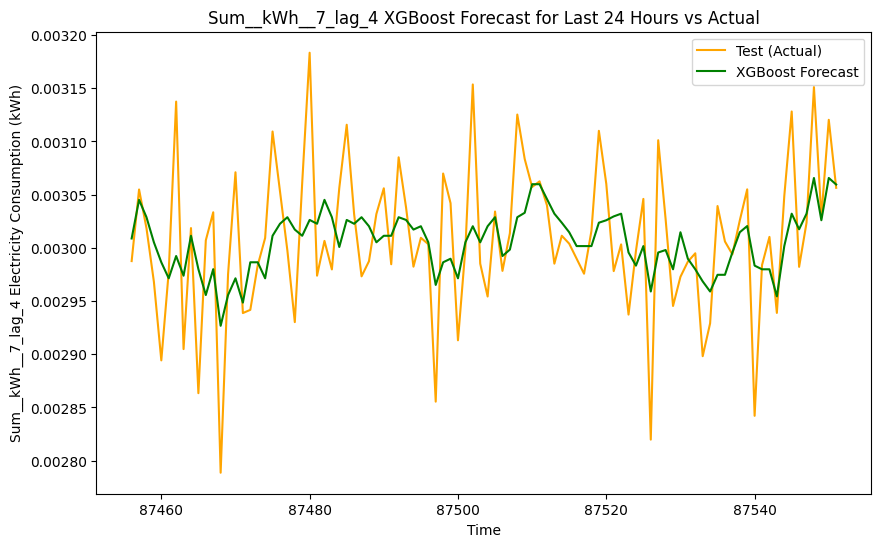

Processing Sum__kWh__7_rolling_1h...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

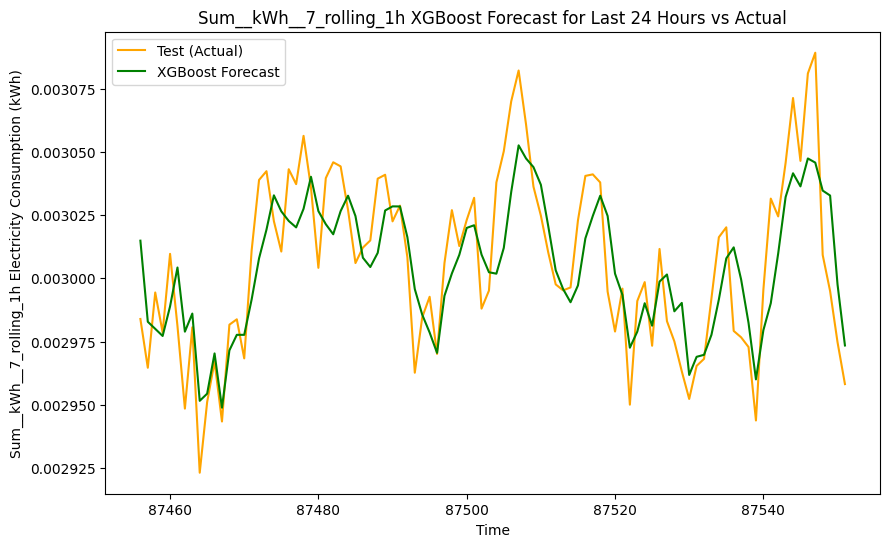

Processing Sum__kWh__7_rolling_1d...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

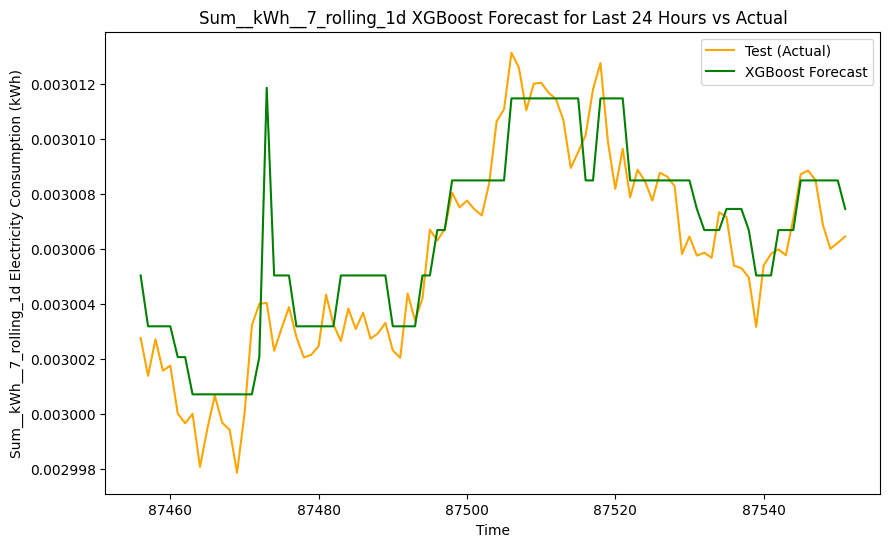

Processing Sum__kWh__8_lag_4...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

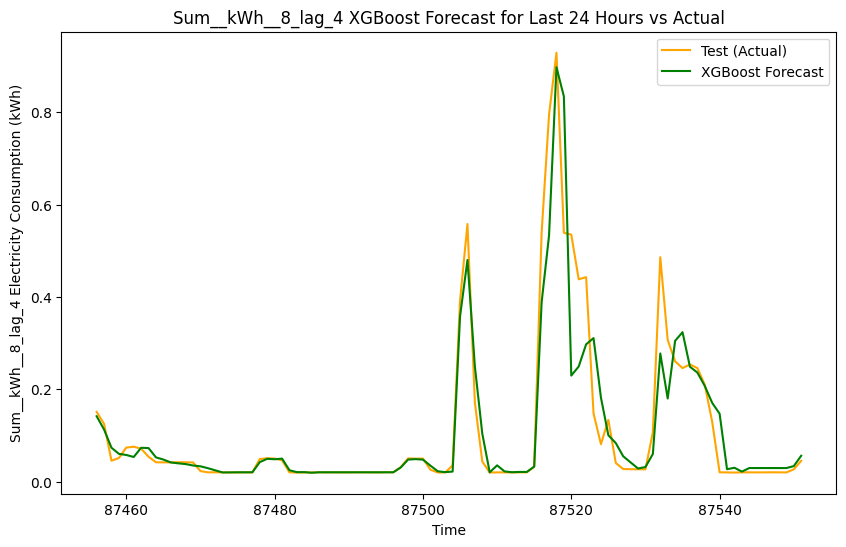

Processing Sum__kWh__8_rolling_1h...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

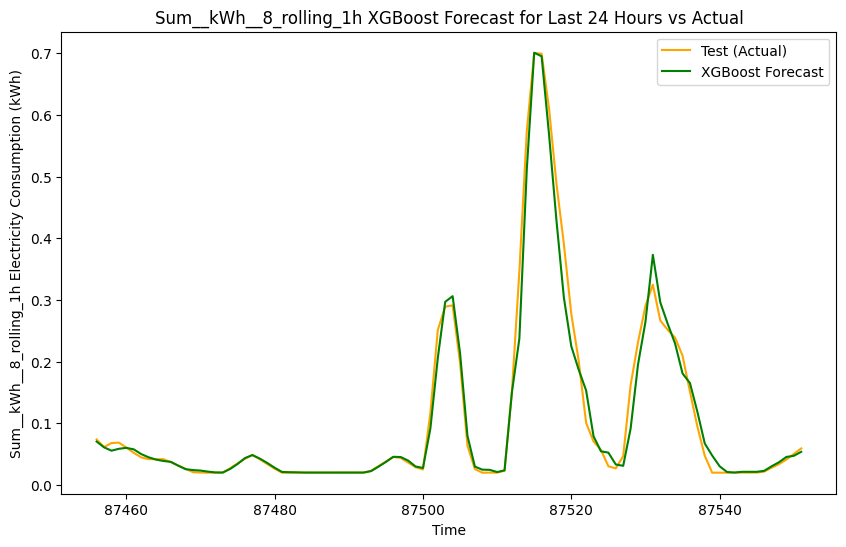

Processing Sum__kWh__8_rolling_1d...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

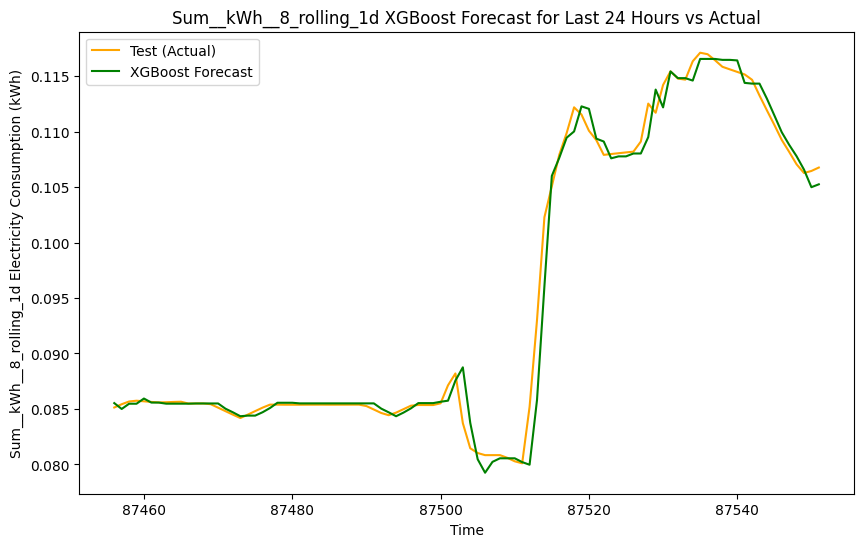

Processing Sum__kWh__9_lag_4...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

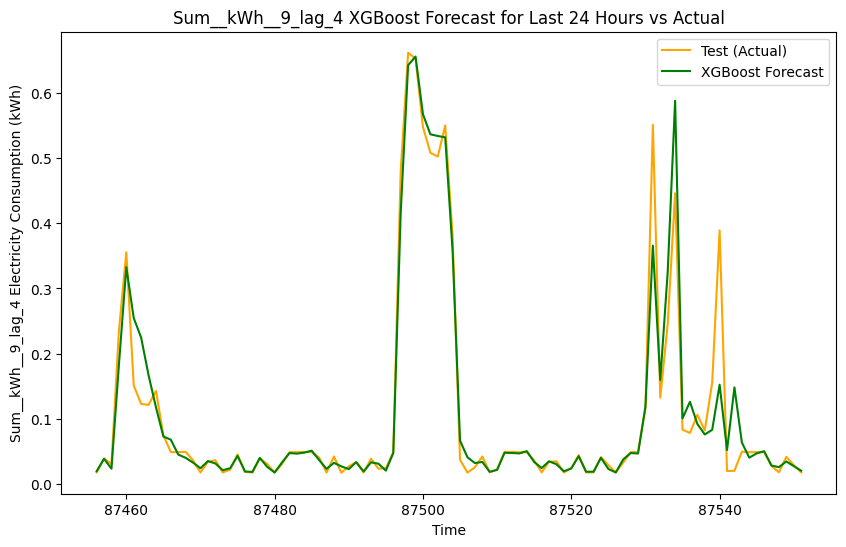

Processing Sum__kWh__9_rolling_1h...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

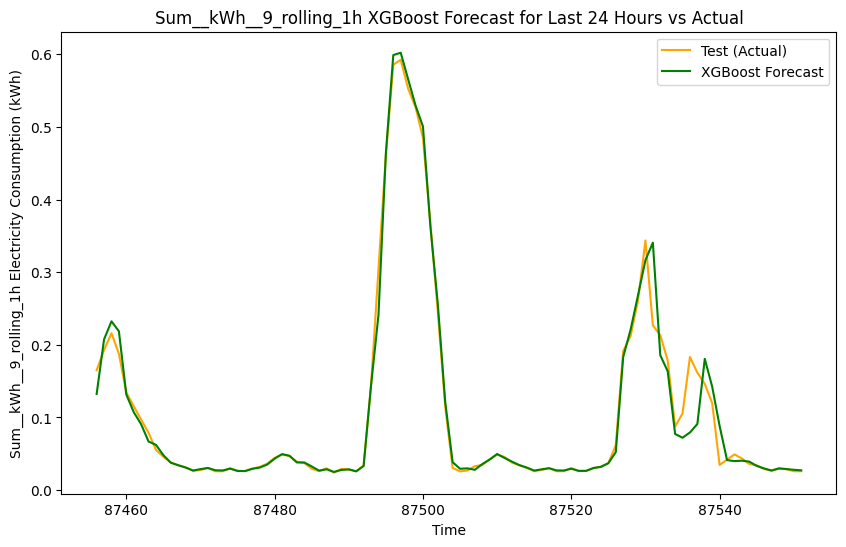

Processing Sum__kWh__9_rolling_1d...


<ipython-input-66-b03b909b0bd4>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
<ipython-input-66-b03b909b0bd4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
<ipython-input-66-b03b909b0bd4>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

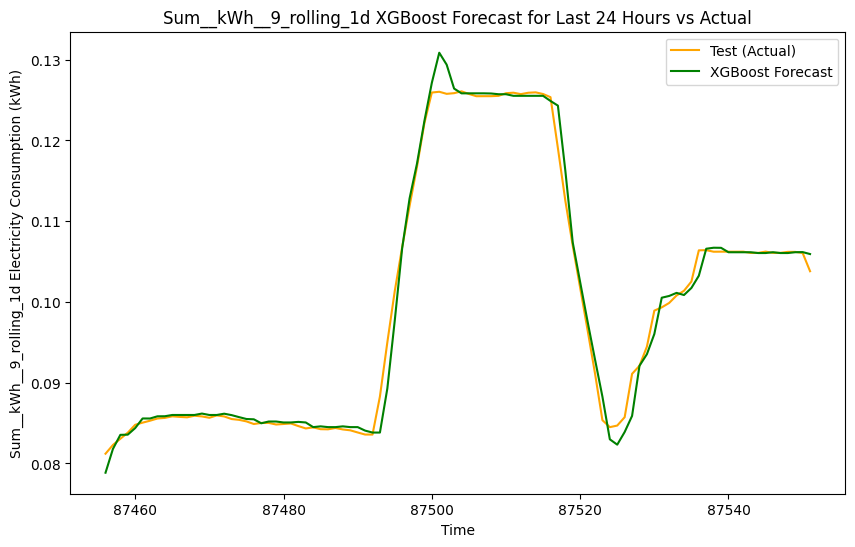

In [66]:
for household in household_columns:
    print(f"Processing {household}...")

    # Create lag and rolling features for the current household
    df[f'{household}_lag_1'] = df[household].shift(1)   # Lag 1 timestep
    df[f'{household}_lag_4'] = df[household].shift(4)   # Lag 1 hour
    df[f'{household}_rolling_1h'] = df[household].rolling(window=4).mean()
    df[f'{household}_rolling_1d'] = df[household].rolling(window=96).mean()

    # Drop NaN values caused by lag/rolling
    household_df = df[[household, f'{household}_lag_1', f'{household}_lag_4',
                       f'{household}_rolling_1h', f'{household}_rolling_1d',
                       'hour', 'day_of_week', 'month']].dropna()

    # Separate the last 24 hours for testing
    train = household_df[:-96]  # Training data (everything except last 24 hours)
    test = household_df[-96:]   # Test data (last 24 hours)

    # Define the features and target for train and test
    X_train = train.drop(columns=[household])
    y_train = train[household]

    X_test = test.drop(columns=[household])
    y_test = test[household]

    # Define the XGBoost regressor model
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

    # Train the XGBoost model
    xgb_model.fit(X_train, y_train)

    # Make predictions for the train set (to calculate train accuracy)
    train_pred = xgb_model.predict(X_train)

    # Make predictions for the test set (to calculate test accuracy)
    test_pred = xgb_model.predict(X_test)

    # Evaluate the forecast for both train and test using MAE and RMSE
    train_mae = mean_absolute_error(y_train, train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

    test_mae = mean_absolute_error(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    # Store the results
    xgb_results[household] = {
        'train_MAE': train_mae, 'train_RMSE': train_rmse,
        'test_MAE': test_mae, 'test_RMSE': test_rmse
    }

    # Plot the XGBoost forecast vs actual for this household (last 24 hours)
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Test (Actual)', color='orange')
    plt.plot(y_test.index, test_pred, label='XGBoost Forecast', color='green')
    plt.xlabel('Time')
    plt.ylabel(f'{household} Electricity Consumption (kWh)')
    plt.title(f'{household} XGBoost Forecast for Last 24 Hours vs Actual')
    plt.legend()
    plt.show()

In [67]:
for household, metrics in xgb_results.items():
    print(f"{household}:\n Train MAE = {metrics['train_MAE']}, Train RMSE = {metrics['train_RMSE']}\n"
          f"Test MAE = {metrics['test_MAE']}, Test RMSE = {metrics['test_RMSE']}\n")

Sum__kWh__0:
 Train MAE = 0.02246200700843333, Train RMSE = 0.06042047177768402
Test MAE = 0.018494432734154173, Test RMSE = 0.04254623098908152

Sum__kWh__1:
 Train MAE = 0.011187122367059368, Train RMSE = 0.03896505741934091
Test MAE = 0.012702104195116401, Test RMSE = 0.03762244953313237

Sum__kWh__2:
 Train MAE = 0.014962391660832951, Train RMSE = 0.04142128547427879
Test MAE = 0.01354946441199866, Test RMSE = 0.03157460503577537

Sum__kWh__3:
 Train MAE = 0.00017407685960903077, Train RMSE = 0.0008752040170467526
Test MAE = 5.5604846055427755e-05, Test RMSE = 7.064259786352436e-05

Sum__kWh__4:
 Train MAE = 0.006117660117159898, Train RMSE = 0.023347003665859428
Test MAE = 0.02240425875126614, Test RMSE = 0.06750272962679436

Sum__kWh__5:
 Train MAE = 0.017317774627595654, Train RMSE = 0.046539782663377424
Test MAE = 0.028435340946569892, Test RMSE = 0.059570383739083924

Sum__kWh__6:
 Train MAE = 0.019023969203335437, Train RMSE = 0.05455562131489125
Test MAE = 0.0261044336033687

XGboost is working better as compared to other models that were tested i this work. It can be further improved by fine-tuning the hyper-parameters